# Notebook Projet Deep Learning : Bank Marketing
--------------
## M2 - MLDS - Formation Altérnance
### Étudiants :
* HADDAD Ayale (haddad.ayale@gmail.com) 
* ISSELNANE Hacene (hacene.isselnane@etu.u-paris.fr)

##### Résumé : 

Les données sont liées aux campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise. L'objectif de la classification est de prédire si le client souscrira un dépôt à terme (variable y).

##### Informations sur l'ensemble des données : 

Les données sont liées aux campagnes de marketing direct d'une institution bancaire portugaise. Les campagnes de marketing ont été basées sur des appels téléphoniques. Souvent, plusieurs contacts avec le même client ont été nécessaires pour savoir si le produit (dépôt à terme bancaire) serait ("oui") ou non ("non") souscrit.



##### Données sur les clients des banques :
- Age (numérique)
- Job : type d'emploi (catégorie : "admin.", "col bleu", "entrepreneur", "femme de ménage", "cadre", "retraité", "indépendant", "services", "étudiant", "technicien", "chômeur", "inconnu")
- Marital : état civil (catégorique : "divorcé", "marié", "célibataire", "inconnu" ; remarque : "divorcé" signifie divorcé ou veuf)
- Education (catégorique : "basic.4y", "basic.6y", "basic.9y", "secondaire", "analphabète", "cours professionnel", "diplôme universitaire", "inconnu")
- Default : le crédit est-il en défaut de paiement ? (catégorique : "non", "oui", "inconnu")
- Housing : a-t-on un prêt au logement ? (catégorique : "non", "oui", "inconnu")
- Loan : a-t-on un prêt personnel ? (catégorique : "non", "oui", "inconnu")

##### En rapport avec le dernier contact de la campagne en cours :

- Contact : type de communication du contact (catégorique : "cellulaire", "téléphone")
- Month : dernier mois de contact de l'année (catégorique : "jan", "feb", "mar", ..., "nov", "dec")
- Day_of_week : dernier jour de contact de la semaine (catégorique : "lun", "mar", "mer", "jeu", "ven")
- Duration : durée du dernier contact, en secondes (numérique). Note importante : cet attribut affecte fortement la cible de sortie (par exemple, si durée=0 alors y='non'). Cependant, la durée n'est pas connue avant l'exécution d'un appel. De même, après la fin de l'appel, y est évidemment connu. Ainsi, cette entrée ne doit être incluse qu'à des fins de référence et doit être écartée si l'intention est d'avoir un modèle prédictif réaliste.

##### Autres attributs :

- Campaign : nombre de contacts effectués pendant cette campagne et pour ce client (numérique, inclut le dernier contact)
- Pdays : nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (numérique ; 999 signifie que le client n'a pas été contacté auparavant)
- Previous : nombre de contacts effectués avant cette campagne et pour ce client (numérique)
- Poutcome : résultat de la campagne de marketing précédente (catégorique : "échec", "inexistant", "succès")

##### Attributs du contexte social et économique

- Emp.var.rate : taux de variation de l'emploi - indicateur trimestriel (numérique)
- Cons.price.idx: indice des prix à la consommation - indicateur mensuel (numérique)
- Cons.conf.idx : indice de confiance des consommateurs - indicateur mensuel (numérique)
- Euribor3m : taux euribor 3 mois - indicateur quotidien (numérique)
- Nr.employed : nombre de salariés - indicateur trimestriel (numérique)

##### Variable de sortie (cible souhaitée) :

- y - le client a-t-il souscrit un dépôt à terme ? (binaire : "oui", "non")


In [4]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 1. Préparation des données

In [6]:
file = tf.keras.utils
bank = pd.read_csv('../bank-additional-full.csv', sep=";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], drop_first = True)

In [10]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


#### 1.1.1 Conversion des variables en variables continues

In [11]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [12]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [13]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


### 1.2 En rapport avec le dernier contact de la campagne actuelle

- Traiter de manière catégorique, voir ces valeurs
- grouper les variables continues si nécessaire

In [14]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


#### 1.2.1 Conversion des variables en variables continues

In [15]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [16]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [17]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


### 1.3 Attributs du contexte social et économique

In [18]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


### 1.4 Autres attributs

In [19]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [20]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [21]:
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


### 1.5 Concat data

In [22]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o,y], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome', 'yes']]
bank_final = bank_final.rename(columns={"yes": "Class"})
bank_final.shape

(41188, 21)

In [23]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,Class
0,3,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
1,3,7,1,3,1,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
2,2,7,1,3,0,2,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
3,2,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
4,3,7,1,3,0,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0


In [24]:
neg, pos = np.bincount(bank_final['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 41188
    Positive: 4640 (11.27% of total)



In [25]:
bank_final.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,Class
count,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,1.978610,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,...,0.081886,93.575664,-40.502600,3.621291,5167.035911,2.567593,962.475454,0.172963,1.169904,0.112654
std,0.735758,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,...,1.570960,0.578840,4.628198,1.734447,72.251528,2.770014,186.910907,0.494901,0.455754,0.316173
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000,999.000000,0.000000,1.000000,0.000000
50%,2.000000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,1.100000,93.749000,-41.800000,4.857000,5191.000000,2.000000,999.000000,0.000000,1.000000,0.000000
75%,2.000000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000,999.000000,0.000000,1.000000,0.000000
max,4.000000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,1.400000,94.767000,-26.900000,5.045000,5228.100000,56.000000,999.000000,7.000000,3.000000,1.000000


In [26]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(bank_final, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [27]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

#train_features = np.clip(train_features, -5, 5)
#val_features = np.clip(val_features, -5, 5)
#test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (26360,)
Validation labels shape: (6590,)
Test labels shape: (8238,)
Training features shape: (26360, 20)
Validation features shape: (6590, 20)
Test features shape: (8238, 20)


C:\Users\Wizard\Anaconda3\envs\keras-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Wizard\Anaconda3\envs\keras-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


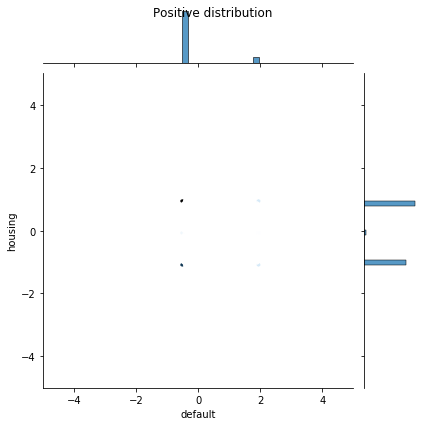

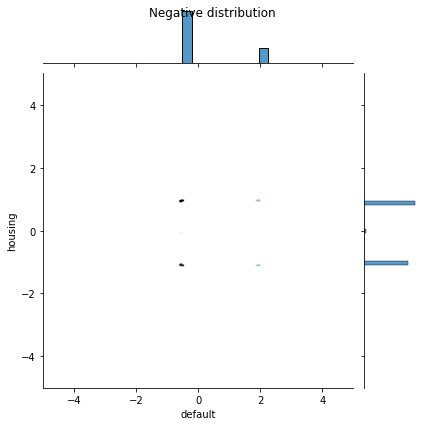

In [28]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

### Jeu de données non equilibré

In [29]:
train_features.shape

(26360, 20)

## Baseline model

In [30]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model_baseline(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [31]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


In [32]:
model = make_model_baseline()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.predict(train_features[:10])

array([[0.36663094],
       [0.49385262],
       [0.81812733],
       [0.52426773],
       [0.20599331],
       [0.24019283],
       [0.38809866],
       [0.377119  ],
       [0.439894  ],
       [0.2930145 ]], dtype=float32)

In [34]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 0.6523


In [35]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.0639121])

In [36]:
model = make_model_baseline(output_bias=initial_bias)
model.predict(train_features[:10])


array([[0.3175165 ],
       [0.17523833],
       [0.13320363],
       [0.05503463],
       [0.15528852],
       [0.11537173],
       [0.28808472],
       [0.15509282],
       [0.6220491 ],
       [0.15539855]], dtype=float32)

In [37]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 0.4277


In [38]:
initial_weights_baseline = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights_baseline)


In [39]:
model = make_model_baseline()
model.load_weights(initial_weights_baseline)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [40]:
model = make_model_baseline()
model.load_weights(initial_weights_baseline)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [41]:
def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch, history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()


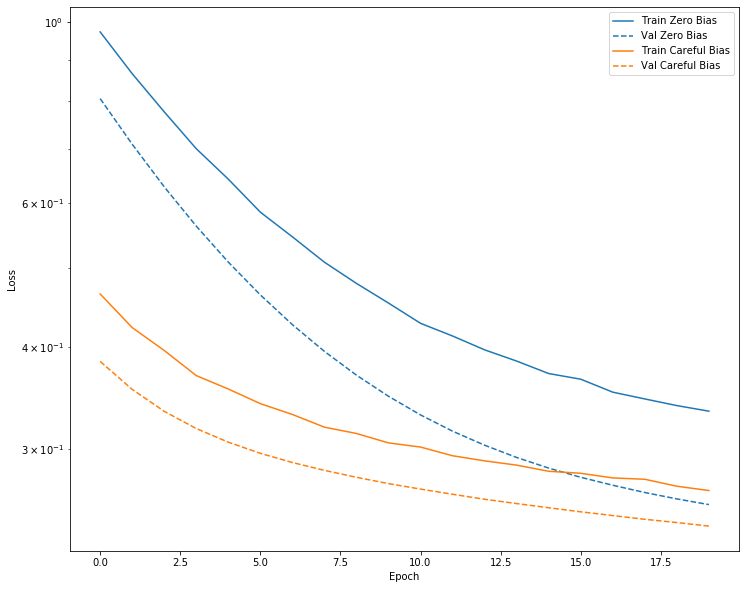

In [42]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)


In [43]:
model = make_model_baseline()
model.load_weights(initial_weights_baseline)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))


Train on 26360 samples, validate on 6590 samples
Epoch 1/100
26360/26360 [==============================] - 2s 82us/sample - loss: 0.4717 - tp: 217.0000 - fp: 1575.0000 - tn: 21805.0000 - fn: 2763.0000 - accuracy: 0.8354 - precision: 0.1211 - recall: 0.0728 - auc: 0.4684 - val_loss: 0.3846 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 5845.0000 - val_fn: 732.0000 - val_accuracy: 0.8877 - val_precision: 0.3846 - val_recall: 0.0068 - val_auc: 0.5065
Epoch 2/100
26360/26360 [==============================] - 0s 3us/sample - loss: 0.4238 - tp: 241.0000 - fp: 885.0000 - tn: 22495.0000 - fn: 2739.0000 - accuracy: 0.8625 - precision: 0.2140 - recall: 0.0809 - auc: 0.5204 - val_loss: 0.3558 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 5848.0000 - val_fn: 730.0000 - val_accuracy: 0.8885 - val_precision: 0.5833 - val_recall: 0.0095 - val_auc: 0.5824
Epoch 3/100
26360/26360 [==============================] - 0s 3us/sample - loss: 0.3936 - tp: 235.0000 - fp: 631.0000 - tn: 22749.0000 - fn: 2745.0000 

26360/26360 [==============================] - 0s 4us/sample - loss: 0.2333 - tp: 841.0000 - fp: 485.0000 - tn: 22895.0000 - fn: 2139.0000 - accuracy: 0.9005 - precision: 0.6342 - recall: 0.2822 - auc: 0.8990 - val_loss: 0.2104 - val_tp: 189.0000 - val_fp: 71.0000 - val_tn: 5782.0000 - val_fn: 548.0000 - val_accuracy: 0.9061 - val_precision: 0.7269 - val_recall: 0.2564 - val_auc: 0.9238
Epoch 42/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.2323 - tp: 840.0000 - fp: 460.0000 - tn: 22920.0000 - fn: 2140.0000 - accuracy: 0.9014 - precision: 0.6462 - recall: 0.2819 - auc: 0.9011 - val_loss: 0.2097 - val_tp: 192.0000 - val_fp: 76.0000 - val_tn: 5777.0000 - val_fn: 545.0000 - val_accuracy: 0.9058 - val_precision: 0.7164 - val_recall: 0.2605 - val_auc: 0.9238
Epoch 43/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.2309 - tp: 845.0000 - fp: 466.0000 - tn: 22914.0000 - fn: 2135.0000 - accuracy: 0.9013 - precision: 0.6445 - recall: 0.2836

26360/26360 [==============================] - 0s 3us/sample - loss: 0.2175 - tp: 985.0000 - fp: 536.0000 - tn: 22844.0000 - fn: 1995.0000 - accuracy: 0.9040 - precision: 0.6476 - recall: 0.3305 - auc: 0.9151 - val_loss: 0.2006 - val_tp: 212.0000 - val_fp: 83.0000 - val_tn: 5770.0000 - val_fn: 525.0000 - val_accuracy: 0.9077 - val_precision: 0.7186 - val_recall: 0.2877 - val_auc: 0.9268
Epoch 82/100
26360/26360 [==============================] - 0s 3us/sample - loss: 0.2180 - tp: 976.0000 - fp: 555.0000 - tn: 22825.0000 - fn: 2004.0000 - accuracy: 0.9029 - precision: 0.6375 - recall: 0.3275 - auc: 0.9156 - val_loss: 0.2008 - val_tp: 207.0000 - val_fp: 79.0000 - val_tn: 5774.0000 - val_fn: 530.0000 - val_accuracy: 0.9076 - val_precision: 0.7238 - val_recall: 0.2809 - val_auc: 0.9268
Epoch 83/100
26360/26360 [==============================] - 0s 3us/sample - loss: 0.2164 - tp: 959.0000 - fp: 519.0000 - tn: 22861.0000 - fn: 2021.0000 - accuracy: 0.9036 - precision: 0.6488 - recall: 0.3218

In [44]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
    if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
        plt.ylim([0.8,1])
    else:
        plt.ylim([0,1])
    plt.legend()

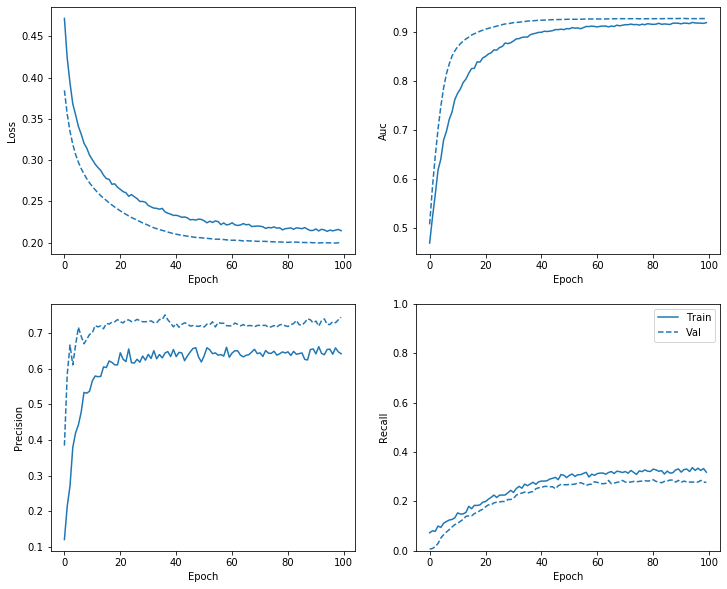

In [45]:
plot_metrics(baseline_history)

In [46]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))


In [47]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)


loss :  0.2031740361219125
tp :  276.0
fp :  108.0
tn :  7207.0
fn :  647.0
accuracy :  0.90835154
precision :  0.71875
recall :  0.2990249
auc :  0.9248983

Legitimate Transactions Detected (True Negatives):  7207
Legitimate Transactions Incorrectly Detected (False Positives):  108
Fraudulent Transactions Missed (False Negatives):  647
Fraudulent Transactions Detected (True Positives):  276
Total Fraudulent Transactions:  923


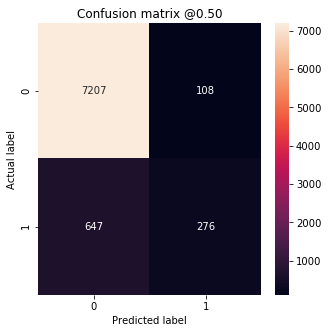

In [48]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()
plot_cm(test_labels, test_predictions_baseline)


In [49]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')


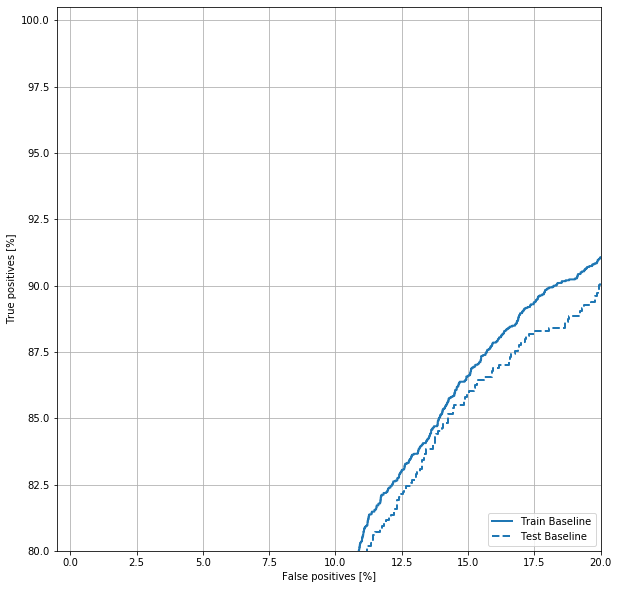

In [50]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')


### Modele plus elaboré

In [51]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
def make_model_elab(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          128, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          64, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          32, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          32, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [52]:
model = make_model_elab()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               2688      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [53]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.5390


In [54]:
initial_weights_elab = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights_elab)
model_elab = make_model_elab()
model_elab.load_weights(initial_weights_elab)
model_elab.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [55]:
model_elab = make_model_elab()
model_elab.load_weights(initial_weights_elab)
careful_bias_history = model_elab.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

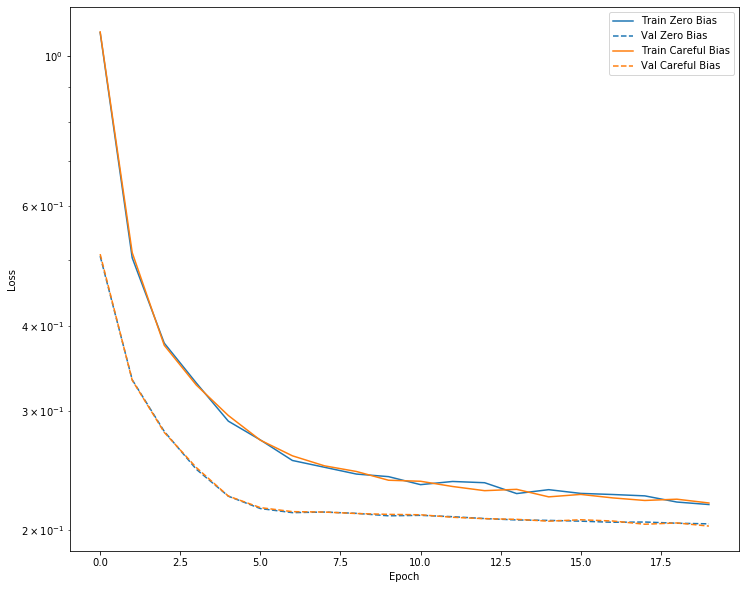

In [56]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

loss :  0.20691801740738858
tp :  532.0
fp :  405.0
tn :  6910.0
fn :  391.0
accuracy :  0.9033746
precision :  0.56776947
recall :  0.5763814
auc :  0.9218767

Legitimate Transactions Detected (True Negatives):  7207
Legitimate Transactions Incorrectly Detected (False Positives):  108
Fraudulent Transactions Missed (False Negatives):  647
Fraudulent Transactions Detected (True Positives):  276
Total Fraudulent Transactions:  923


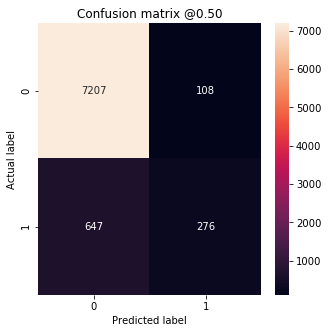

In [57]:
train_predictions_elab = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_elab = model.predict(test_features, batch_size=BATCH_SIZE)
elab_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, elab_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)


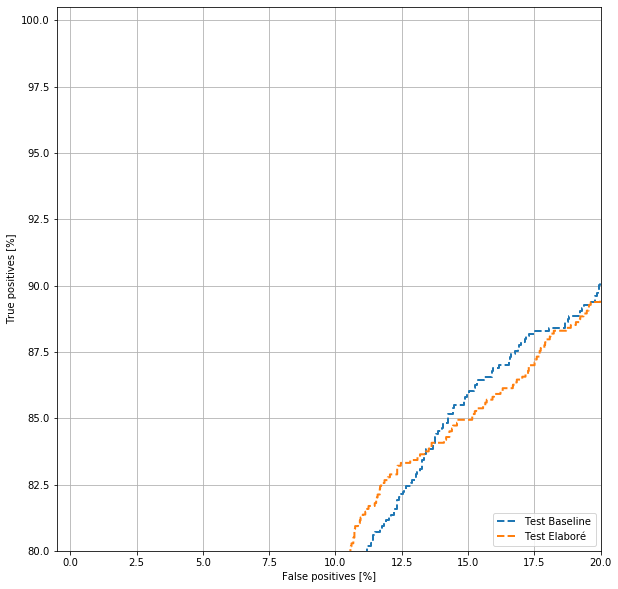

In [58]:
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Test Elaboré", test_labels, test_predictions_elab, color=colors[1], linestyle='--')
plt.legend(loc='lower right')


## Class weights

In [59]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 0.56
Weight for class 1: 4.44


In [60]:
weighted_model = make_model_baseline()
weighted_model.load_weights(initial_weights_baseline)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 26360 samples, validate on 6590 samples
Epoch 1/100
26360/26360 [==============================] - 3s 97us/sample - loss: 1.2124 - tp: 290.0000 - fp: 1971.0000 - tn: 21409.0000 - fn: 2690.0000 - accuracy: 0.8232 - precision: 0.1283 - recall: 0.0973 - auc: 0.4666 - val_loss: 1.0474 - val_tp: 18.0000 - val_fp: 60.0000 - val_tn: 5793.0000 - val_fn: 719.0000 - val_accuracy: 0.8818 - val_precision: 0.2308 - val_recall: 0.0244 - val_auc: 0.5068
Epoch 2/100
26360/26360 [==============================] - 0s 4us/sample - loss: 1.0785 - tp: 466.0000 - fp: 2196.0000 - tn: 21184.0000 - fn: 2514.0000 - accuracy: 0.8213 - precision: 0.1751 - recall: 0.1564 - auc: 0.5201 - val_loss: 0.9177 - val_tp: 48.0000 - val_fp: 100.0000 - val_tn: 5753.0000 - val_fn: 689.0000 - val_accuracy: 0.8803 - val_precision: 0.3243 - val_recall: 0.0651 - val_auc: 0.5847
Epoch 3/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.9734 - tp: 6

Epoch 21/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.5315 - tp: 1991.0000 - fp: 4293.0000 - tn: 19087.0000 - fn: 989.0000 - accuracy: 0.7996 - precision: 0.3168 - recall: 0.6681 - auc: 0.8279 - val_loss: 0.4230 - val_tp: 575.0000 - val_fp: 905.0000 - val_tn: 4948.0000 - val_fn: 162.0000 - val_accuracy: 0.8381 - val_precision: 0.3885 - val_recall: 0.7802 - val_auc: 0.8994
Epoch 22/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.5157 - tp: 2016.0000 - fp: 4199.0000 - tn: 19181.0000 - fn: 964.0000 - accuracy: 0.8041 - precision: 0.3244 - recall: 0.6765 - auc: 0.8380 - val_loss: 0.4186 - val_tp: 575.0000 - val_fp: 890.0000 - val_tn: 4963.0000 - val_fn: 162.0000 - val_accuracy: 0.8404 - val_precision: 0.3925 - val_recall: 0.7802 - val_auc: 0.9017
Epoch 23/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.5185 - tp: 2027.0000 - fp: 4236.0000 - tn: 19144.0000 - fn: 953.0000 - accuracy: 0.8031 - precision: 0.323

26360/26360 [==============================] - 0s 7us/sample - loss: 0.4062 - tp: 2394.0000 - fp: 3738.0000 - tn: 19642.0000 - fn: 586.0000 - accuracy: 0.8360 - precision: 0.3904 - recall: 0.8034 - auc: 0.9043 - val_loss: 0.3530 - val_tp: 634.0000 - val_fp: 885.0000 - val_tn: 4968.0000 - val_fn: 103.0000 - val_accuracy: 0.8501 - val_precision: 0.4174 - val_recall: 0.8602 - val_auc: 0.9232
Epoch 62/100
26360/26360 [==============================] - 0s 7us/sample - loss: 0.4070 - tp: 2388.0000 - fp: 3695.0000 - tn: 19685.0000 - fn: 592.0000 - accuracy: 0.8374 - precision: 0.3926 - recall: 0.8013 - auc: 0.9040 - val_loss: 0.3525 - val_tp: 631.0000 - val_fp: 880.0000 - val_tn: 4973.0000 - val_fn: 106.0000 - val_accuracy: 0.8504 - val_precision: 0.4176 - val_recall: 0.8562 - val_auc: 0.9234
Epoch 63/100
26360/26360 [==============================] - 0s 7us/sample - loss: 0.4067 - tp: 2346.0000 - fp: 3667.0000 - tn: 19713.0000 - fn: 634.0000 - accuracy: 0.8368 - precision: 0.3902 - recall: 0

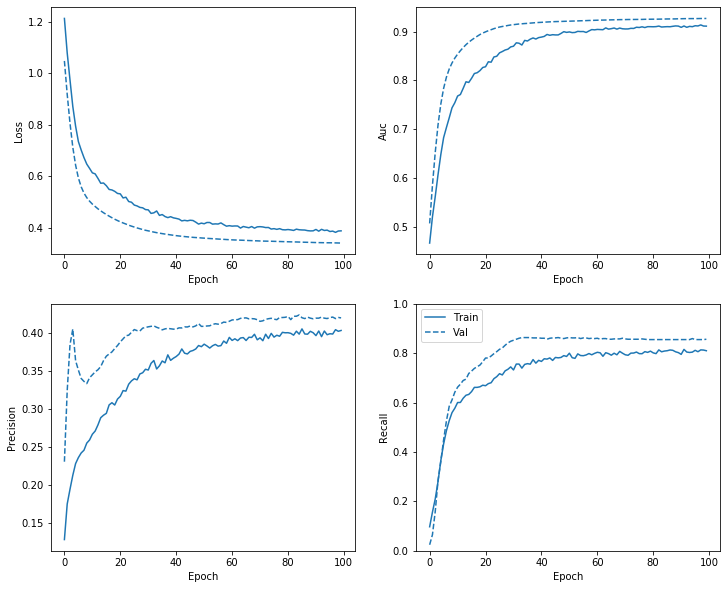

In [61]:
plot_metrics(weighted_history)

loss :  0.36618688453687975
tp :  786.0
fp :  1111.0
tn :  6204.0
fn :  137.0
accuracy :  0.8485069
precision :  0.41433844
recall :  0.85157096
auc :  0.9234706

Legitimate Transactions Detected (True Negatives):  6204
Legitimate Transactions Incorrectly Detected (False Positives):  1111
Fraudulent Transactions Missed (False Negatives):  137
Fraudulent Transactions Detected (True Positives):  786
Total Fraudulent Transactions:  923


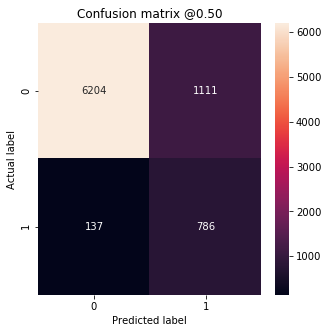

In [62]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)


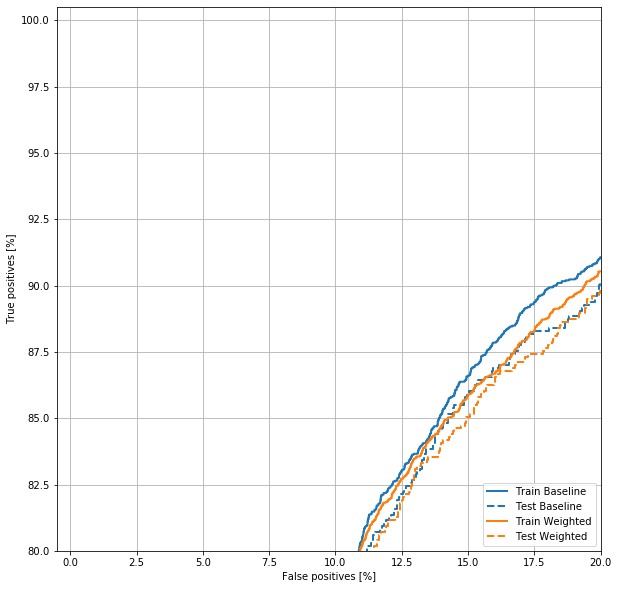

In [63]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')


### Modele elaboré

In [64]:
weighted_model_elab = make_model_elab()
weighted_model_elab.load_weights(initial_weights_elab)

weighted_history_elab = weighted_model_elab.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 26360 samples, validate on 6590 samples
Epoch 1/100
26360/26360 [==============================] - 3s 108us/sample - loss: 0.8187 - tp: 2688.0000 - fp: 20504.0000 - tn: 2876.0000 - fn: 292.0000 - accuracy: 0.2111 - precision: 0.1159 - recall: 0.9020 - auc: 0.5051 - val_loss: 0.6122 - val_tp: 608.0000 - val_fp: 2925.0000 - val_tn: 2928.0000 - val_fn: 129.0000 - val_accuracy: 0.5366 - val_precision: 0.1721 - val_recall: 0.8250 - val_auc: 0.7435
Epoch 2/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.6190 - tp: 2267.0000 - fp: 10495.0000 - tn: 12885.0000 - fn: 713.0000 - accuracy: 0.5748 - precision: 0.1776 - recall: 0.7607 - auc: 0.7236 - val_loss: 0.4956 - val_tp: 575.0000 - val_fp: 1812.0000 - val_tn: 4041.0000 - val_fn: 162.0000 - val_accuracy: 0.7005 - val_precision: 0.2409 - val_recall: 0.7802 - val_auc: 0.8421
Epoch 3/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.5110 

Epoch 21/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.3331 - tp: 2726.0000 - fp: 4783.0000 - tn: 18597.0000 - fn: 254.0000 - accuracy: 0.8089 - precision: 0.3630 - recall: 0.9148 - auc: 0.9266 - val_loss: 0.3242 - val_tp: 694.0000 - val_fp: 1268.0000 - val_tn: 4585.0000 - val_fn: 43.0000 - val_accuracy: 0.8011 - val_precision: 0.3537 - val_recall: 0.9417 - val_auc: 0.9321
Epoch 22/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.3365 - tp: 2737.0000 - fp: 4976.0000 - tn: 18404.0000 - fn: 243.0000 - accuracy: 0.8020 - precision: 0.3549 - recall: 0.9185 - auc: 0.9255 - val_loss: 0.3206 - val_tp: 687.0000 - val_fp: 1195.0000 - val_tn: 4658.0000 - val_fn: 50.0000 - val_accuracy: 0.8111 - val_precision: 0.3650 - val_recall: 0.9322 - val_auc: 0.9326
Epoch 23/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.3264 - tp: 2757.0000 - fp: 4911.0000 - tn: 18469.0000 - fn: 223.0000 - accuracy: 0.8052 - precision: 0.359

26360/26360 [==============================] - 0s 4us/sample - loss: 0.2900 - tp: 2798.0000 - fp: 4232.0000 - tn: 19148.0000 - fn: 182.0000 - accuracy: 0.8325 - precision: 0.3980 - recall: 0.9389 - auc: 0.9403 - val_loss: 0.3187 - val_tp: 682.0000 - val_fp: 1125.0000 - val_tn: 4728.0000 - val_fn: 55.0000 - val_accuracy: 0.8209 - val_precision: 0.3774 - val_recall: 0.9254 - val_auc: 0.9355
Epoch 62/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.2901 - tp: 2802.0000 - fp: 4337.0000 - tn: 19043.0000 - fn: 178.0000 - accuracy: 0.8287 - precision: 0.3925 - recall: 0.9403 - auc: 0.9407 - val_loss: 0.3190 - val_tp: 682.0000 - val_fp: 1134.0000 - val_tn: 4719.0000 - val_fn: 55.0000 - val_accuracy: 0.8196 - val_precision: 0.3756 - val_recall: 0.9254 - val_auc: 0.9354
Epoch 63/100
26360/26360 [==============================] - 0s 4us/sample - loss: 0.2889 - tp: 2805.0000 - fp: 4239.0000 - tn: 19141.0000 - fn: 175.0000 - accuracy: 0.8325 - precision: 0.3982 - recall: 0

loss :  0.34003124878978985
tp :  856.0
fp :  1476.0
tn :  5839.0
fn :  67.0
accuracy :  0.81269723
precision :  0.3670669
recall :  0.9274106
auc :  0.9339315

Legitimate Transactions Detected (True Negatives):  6204
Legitimate Transactions Incorrectly Detected (False Positives):  1111
Fraudulent Transactions Missed (False Negatives):  137
Fraudulent Transactions Detected (True Positives):  786
Total Fraudulent Transactions:  923


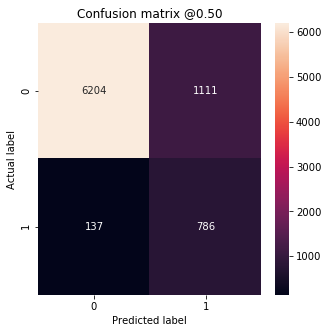

In [65]:
train_predictions_weighted_elab = weighted_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted_elab = weighted_model_elab.predict(test_features, batch_size=BATCH_SIZE)

weighted_results_elab = weighted_model_elab.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model_elab.metrics_names, weighted_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

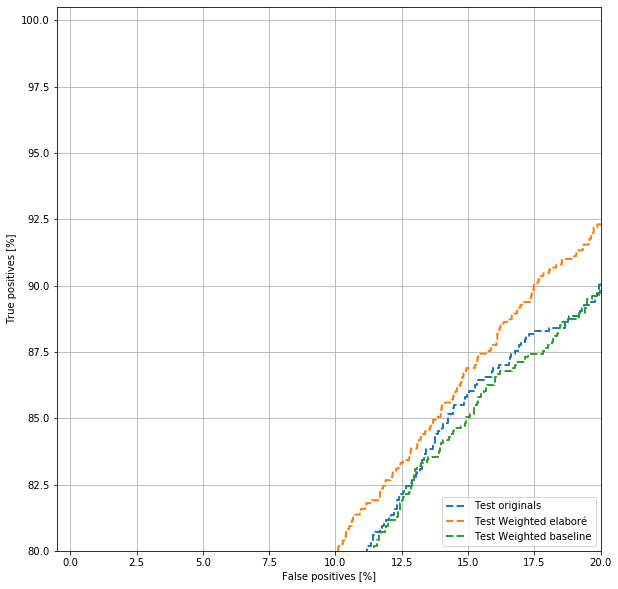

In [66]:
plot_roc("Test originals", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')


plot_roc("Test Weighted elaboré", test_labels, test_predictions_weighted_elab, color=colors[1], linestyle='--')
plot_roc("Test Weighted baseline", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

plt.legend(loc='lower right')

## Oversampling
### Random Sampling

In [67]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]


In [68]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(23380, 20)

In [69]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(46760, 20)

In [70]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)


In [71]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())


Features:
 [ 1.39275963  0.63119421 -0.28261173  1.05185086 -0.51359914  0.94110437
 -0.44827453 -0.75962268  0.76635924 -0.71634208  1.95758653 -1.20014401
 -1.18451306 -1.23301981 -1.30885105 -0.93976516  0.15458375  0.19388256
 -0.34906164 -0.37350244]

Label:  1


In [72]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

for features, label in resampled_ds.take(1):
    print(label.numpy().mean())


0.4921875


In [73]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

36.0

In [74]:
resampled_model_baseline = make_model_baseline()
resampled_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model_baseline.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)


Train for 36.0 steps, validate for 4 steps
Epoch 1/100
36/36 [==============================] - 3s 91ms/step - loss: 0.8587 - tp: 22318.0000 - fp: 21772.0000 - tn: 15108.0000 - fn: 14530.0000 - accuracy: 0.5076 - precision: 0.5062 - recall: 0.6057 - auc: 0.5205 - val_loss: 0.7396 - val_tp: 533.0000 - val_fp: 3315.0000 - val_tn: 2538.0000 - val_fn: 204.0000 - val_accuracy: 0.4660 - val_precision: 0.1385 - val_recall: 0.7232 - val_auc: 0.6472
Epoch 2/100
36/36 [==============================] - 1s 14ms/step - loss: 0.7051 - tp: 25246.0000 - fp: 18341.0000 - tn: 18444.0000 - fn: 11697.0000 - accuracy: 0.5926 - precision: 0.5792 - recall: 0.6834 - auc: 0.6421 - val_loss: 0.6430 - val_tp: 591.0000 - val_fp: 2199.0000 - val_tn: 3654.0000 - val_fn: 146.0000 - val_accuracy: 0.6442 - val_precision: 0.2118 - val_recall: 0.8019 - val_auc: 0.7895
Epoch 3/100
36/36 [==============================] - 1s 21ms/step - loss: 0.6227 - tp: 26731.0000 - fp: 15029.0000 - tn: 21884.0000 - fn: 10084.0000 - ac

Epoch 42/100
36/36 [==============================] - 1s 22ms/step - loss: 0.3554 - tp: 31961.0000 - fp: 6209.0000 - tn: 30871.0000 - fn: 4687.0000 - accuracy: 0.8522 - precision: 0.8373 - recall: 0.8721 - auc: 0.9209 - val_loss: 0.3343 - val_tp: 642.0000 - val_fp: 944.0000 - val_tn: 4909.0000 - val_fn: 95.0000 - val_accuracy: 0.8423 - val_precision: 0.4048 - val_recall: 0.8711 - val_auc: 0.9286
Epoch 43/100
36/36 [==============================] - 1s 22ms/step - loss: 0.3562 - tp: 32053.0000 - fp: 6258.0000 - tn: 30727.0000 - fn: 4690.0000 - accuracy: 0.8515 - precision: 0.8367 - recall: 0.8724 - auc: 0.9206 - val_loss: 0.3362 - val_tp: 648.0000 - val_fp: 959.0000 - val_tn: 4894.0000 - val_fn: 89.0000 - val_accuracy: 0.8410 - val_precision: 0.4032 - val_recall: 0.8792 - val_auc: 0.9285
Epoch 44/100
36/36 [==============================] - 1s 21ms/step - loss: 0.3567 - tp: 32095.0000 - fp: 6339.0000 - tn: 30623.0000 - fn: 4671.0000 - accuracy: 0.8507 - precision: 0.8351 - recall: 0.873

Epoch 83/100
36/36 [==============================] - 1s 21ms/step - loss: 0.3464 - tp: 33215.0000 - fp: 6733.0000 - tn: 29923.0000 - fn: 3857.0000 - accuracy: 0.8564 - precision: 0.8315 - recall: 0.8960 - auc: 0.9239 - val_loss: 0.3332 - val_tp: 662.0000 - val_fp: 1028.0000 - val_tn: 4825.0000 - val_fn: 75.0000 - val_accuracy: 0.8326 - val_precision: 0.3917 - val_recall: 0.8982 - val_auc: 0.9304
Epoch 84/100
36/36 [==============================] - 1s 21ms/step - loss: 0.3466 - tp: 32939.0000 - fp: 6746.0000 - tn: 30165.0000 - fn: 3878.0000 - accuracy: 0.8559 - precision: 0.8300 - recall: 0.8947 - auc: 0.9237 - val_loss: 0.3322 - val_tp: 663.0000 - val_fp: 1024.0000 - val_tn: 4829.0000 - val_fn: 74.0000 - val_accuracy: 0.8334 - val_precision: 0.3930 - val_recall: 0.8996 - val_auc: 0.9305
Epoch 85/100
36/36 [==============================] - 1s 21ms/step - loss: 0.3448 - tp: 33078.0000 - fp: 6687.0000 - tn: 30126.0000 - fn: 3837.0000 - accuracy: 0.8573 - precision: 0.8318 - recall: 0.8

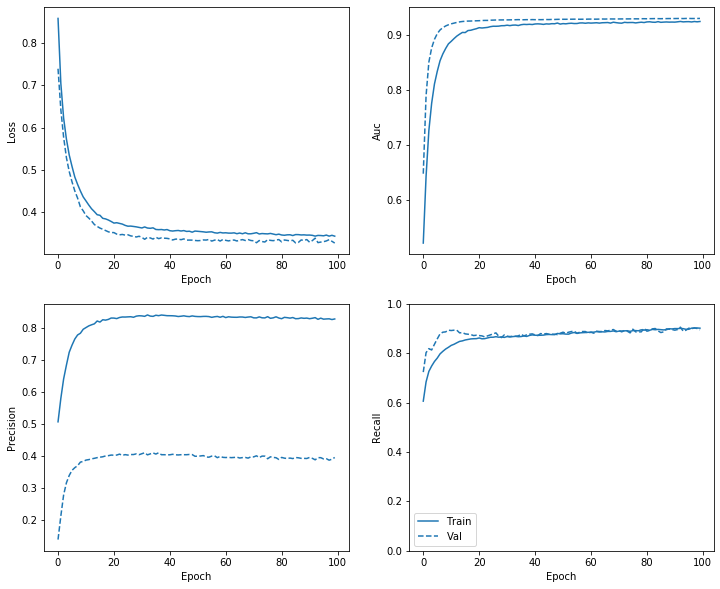

In [75]:
plot_metrics(resampled_history)

In [76]:
resampled_model_baseline = make_model_baseline()
resampled_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_baseline.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model_baseline.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))


Train for 20 steps, validate for 4 steps
Epoch 1/1000
20/20 [==============================] - 3s 126ms/step - loss: 0.9071 - tp: 11908.0000 - fp: 12472.0000 - tn: 7991.0000 - fn: 8589.0000 - accuracy: 0.4858 - precision: 0.4884 - recall: 0.5810 - auc: 0.4894 - val_loss: 0.8023 - val_tp: 493.0000 - val_fp: 3734.0000 - val_tn: 2119.0000 - val_fn: 244.0000 - val_accuracy: 0.3964 - val_precision: 0.1166 - val_recall: 0.6689 - val_auc: 0.5564
Epoch 2/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.7940 - tp: 13021.0000 - fp: 11659.0000 - tn: 8901.0000 - fn: 7379.0000 - accuracy: 0.5352 - precision: 0.5276 - recall: 0.6383 - auc: 0.5642 - val_loss: 0.7265 - val_tp: 544.0000 - val_fp: 3207.0000 - val_tn: 2646.0000 - val_fn: 193.0000 - val_accuracy: 0.4841 - val_precision: 0.1450 - val_recall: 0.7381 - val_auc: 0.6674
Epoch 3/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.7122 - tp: 14052.0000 - fp: 10283.0000 - tn: 10072.0000 - fn: 6553.0000 - accura

20/20 [==============================] - 0s 19ms/step - loss: 0.3733 - tp: 17564.0000 - fp: 3575.0000 - tn: 16977.0000 - fn: 2844.0000 - accuracy: 0.8433 - precision: 0.8309 - recall: 0.8606 - auc: 0.9141 - val_loss: 0.3464 - val_tp: 638.0000 - val_fp: 937.0000 - val_tn: 4916.0000 - val_fn: 99.0000 - val_accuracy: 0.8428 - val_precision: 0.4051 - val_recall: 0.8657 - val_auc: 0.9271
Epoch 42/1000
20/20 [==============================] - 0s 22ms/step - loss: 0.3717 - tp: 17755.0000 - fp: 3504.0000 - tn: 16821.0000 - fn: 2880.0000 - accuracy: 0.8441 - precision: 0.8352 - recall: 0.8604 - auc: 0.9144 - val_loss: 0.3466 - val_tp: 638.0000 - val_fp: 944.0000 - val_tn: 4909.0000 - val_fn: 99.0000 - val_accuracy: 0.8417 - val_precision: 0.4033 - val_recall: 0.8657 - val_auc: 0.9271
Epoch 43/1000
20/20 [==============================] - 0s 22ms/step - loss: 0.3702 - tp: 17702.0000 - fp: 3519.0000 - tn: 16965.0000 - fn: 2774.0000 - accuracy: 0.8464 - precision: 0.8342 - recall: 0.8645 - auc: 0.

20/20 [==============================] - 0s 20ms/step - loss: 0.3567 - tp: 17938.0000 - fp: 3546.0000 - tn: 16892.0000 - fn: 2584.0000 - accuracy: 0.8503 - precision: 0.8349 - recall: 0.8741 - auc: 0.9202 - val_loss: 0.3366 - val_tp: 652.0000 - val_fp: 967.0000 - val_tn: 4886.0000 - val_fn: 85.0000 - val_accuracy: 0.8404 - val_precision: 0.4027 - val_recall: 0.8847 - val_auc: 0.9288
Epoch 82/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.3571 - tp: 17951.0000 - fp: 3489.0000 - tn: 16949.0000 - fn: 2571.0000 - accuracy: 0.8521 - precision: 0.8373 - recall: 0.8747 - auc: 0.9202 - val_loss: 0.3361 - val_tp: 645.0000 - val_fp: 963.0000 - val_tn: 4890.0000 - val_fn: 92.0000 - val_accuracy: 0.8399 - val_precision: 0.4011 - val_recall: 0.8752 - val_auc: 0.9287
Epoch 83/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.3550 - tp: 17989.0000 - fp: 3460.0000 - tn: 16972.0000 - fn: 2539.0000 - accuracy: 0.8535 - precision: 0.8387 - recall: 0.8763 - auc: 0.

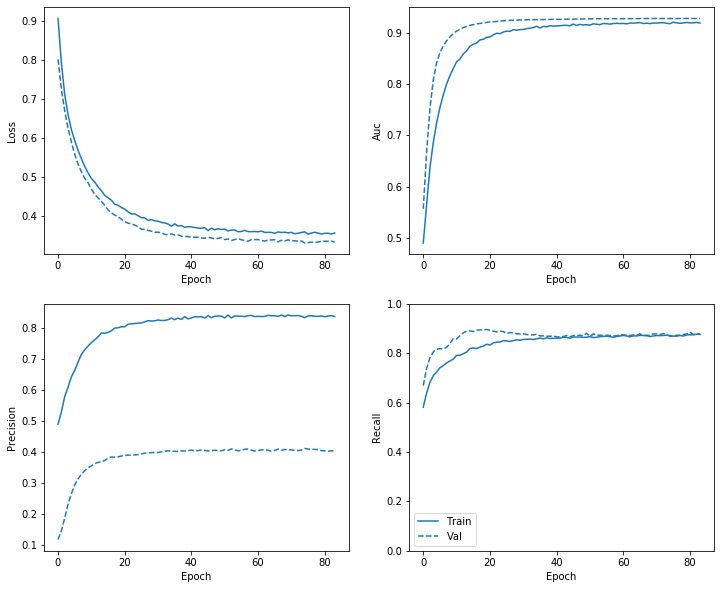

In [77]:
plot_metrics(resampled_history)


In [78]:
train_predictions_resampled = resampled_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model_baseline.predict(test_features, batch_size=BATCH_SIZE)


loss :  0.35314171110637327
tp :  805.0
fp :  1198.0
tn :  6117.0
fn :  118.0
accuracy :  0.84025246
precision :  0.40189716
recall :  0.872156
auc :  0.92692816

Legitimate Transactions Detected (True Negatives):  6117
Legitimate Transactions Incorrectly Detected (False Positives):  1198
Fraudulent Transactions Missed (False Negatives):  118
Fraudulent Transactions Detected (True Positives):  805
Total Fraudulent Transactions:  923


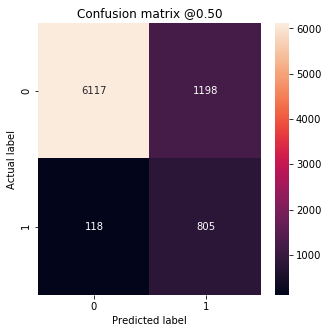

In [79]:
resampled_results = resampled_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_baseline.metrics_names, resampled_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)


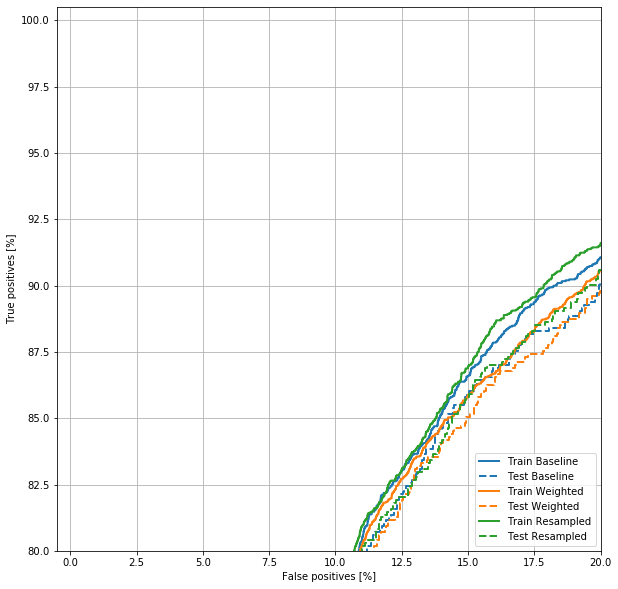

In [80]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')


### Modele elaboré

In [81]:
resampled_model_elab = make_model_elab()
resampled_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model_elab.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train for 36.0 steps, validate for 4 steps
Epoch 1/100
36/36 [==============================] - 4s 100ms/step - loss: 0.5710 - tp: 27835.0000 - fp: 13700.0000 - tn: 23180.0000 - fn: 9013.0000 - accuracy: 0.6919 - precision: 0.6702 - recall: 0.7554 - auc: 0.7767 - val_loss: 0.4147 - val_tp: 667.0000 - val_fp: 1273.0000 - val_tn: 4580.0000 - val_fn: 70.0000 - val_accuracy: 0.7962 - val_precision: 0.3438 - val_recall: 0.9050 - val_auc: 0.9135
Epoch 2/100
36/36 [==============================] - 1s 14ms/step - loss: 0.3925 - tp: 32373.0000 - fp: 7811.0000 - tn: 28974.0000 - fn: 4570.0000 - accuracy: 0.8321 - precision: 0.8056 - recall: 0.8763 - auc: 0.9016 - val_loss: 0.3457 - val_tp: 673.0000 - val_fp: 1257.0000 - val_tn: 4596.0000 - val_fn: 64.0000 - val_accuracy: 0.7995 - val_precision: 0.3487 - val_recall: 0.9132 - val_auc: 0.9257
Epoch 3/100
36/36 [==============================] - 1s 21ms/step - loss: 0.3600 - tp: 33271.0000 - fp: 7761.0000 - tn: 29152.0000 - fn: 3544.0000 - accuracy

In [82]:
resampled_model_elab = make_model_elab()
resampled_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_elab.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model_elab.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Train for 20 steps, validate for 4 steps
Epoch 1/1000
20/20 [==============================] - 3s 139ms/step - loss: 0.6275 - tp: 14992.0000 - fp: 9376.0000 - tn: 11087.0000 - fn: 5505.0000 - accuracy: 0.6367 - precision: 0.6152 - recall: 0.7314 - auc: 0.7088 - val_loss: 0.5450 - val_tp: 550.0000 - val_fp: 1661.0000 - val_tn: 4192.0000 - val_fn: 187.0000 - val_accuracy: 0.7196 - val_precision: 0.2488 - val_recall: 0.7463 - val_auc: 0.8466
Epoch 2/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.4802 - tp: 16183.0000 - fp: 5007.0000 - tn: 15553.0000 - fn: 4217.0000 - accuracy: 0.7748 - precision: 0.7637 - recall: 0.7933 - auc: 0.8546 - val_loss: 0.3673 - val_tp: 649.0000 - val_fp: 1154.0000 - val_tn: 4699.0000 - val_fn: 88.0000 - val_accuracy: 0.8115 - val_precision: 0.3600 - val_recall: 0.8806 - val_auc: 0.9187
Epoch 3/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.3980 - tp: 17919.0000 - fp: 4222.0000 - tn: 16133.0000 - fn: 2686.0000 - accuracy

loss :  0.29868051278038377
tp :  826.0
fp :  1211.0
tn :  6104.0
fn :  97.0
accuracy :  0.8412236
precision :  0.4054983
recall :  0.8949079
auc :  0.9354564

Legitimate Transactions Detected (True Negatives):  6104
Legitimate Transactions Incorrectly Detected (False Positives):  1211
Fraudulent Transactions Missed (False Negatives):  97
Fraudulent Transactions Detected (True Positives):  826
Total Fraudulent Transactions:  923


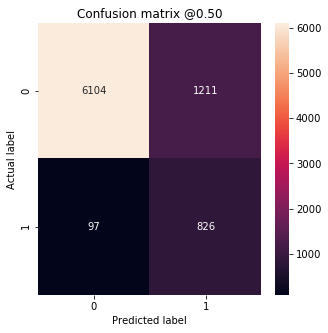

In [83]:
train_predictions_resampled_elab = resampled_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled_elab = resampled_model_elab.predict(test_features, batch_size=BATCH_SIZE)
resampled_results_elab = resampled_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_elab.metrics_names, resampled_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled_elab)


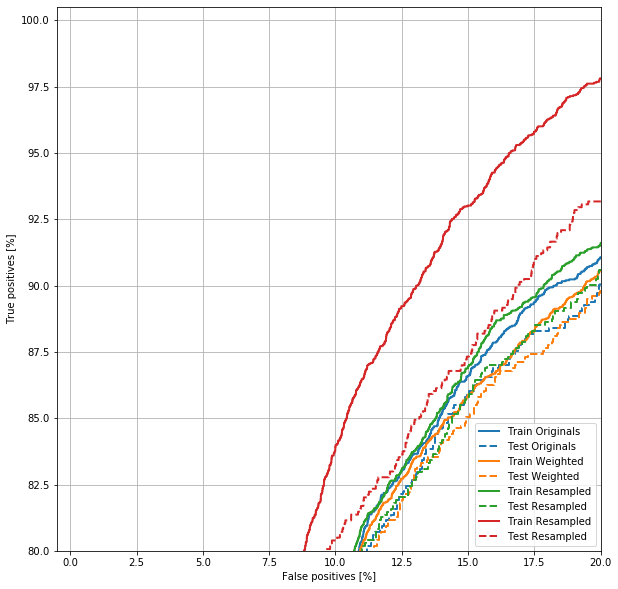

In [84]:
plot_roc("Train Originals", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Originals", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

plot_roc("Train Resampled", train_labels, train_predictions_resampled_elab, color=colors[3])
plot_roc("Test Resampled", test_labels, test_predictions_resampled_elab, color=colors[3], linestyle='--')
plt.legend(loc='lower right')

### SMOTE

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
train_features_SMOTE, train_labels_SMOTE = SMOTE().fit_sample(train_features, train_labels)

In [87]:
smote_model_baseline = make_model_baseline()
smote_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_model_baseline.fit(
    train_features_SMOTE,
    train_labels_SMOTE,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46760 samples, validate for 4 steps
Epoch 1/100
46760/46760 [==============================] - 9s 194us/sample - loss: 0.4669 - tp: 19331.0000 - fp: 6270.0000 - tn: 17110.0000 - fn: 4049.0000 - accuracy: 0.7793 - precision: 0.7551 - recall: 0.8268 - auc: 0.8596 - val_loss: 0.3497 - val_tp: 643.0000 - val_fp: 998.0000 - val_tn: 4855.0000 - val_fn: 94.0000 - val_accuracy: 0.8343 - val_precision: 0.3918 - val_recall: 0.8725 - val_auc: 0.9224
Epoch 2/100
46760/46760 [==============================] - 6s 137us/sample - loss: 0.3569 - tp: 20870.0000 - fp: 4319.0000 - tn: 19061.0000 - fn: 2510.0000 - accuracy: 0.8540 - precision: 0.8285 - recall: 0.8926 - auc: 0.9196 - val_loss: 0.3292 - val_tp: 645.0000 - val_fp: 972.0000 - val_tn: 4881.0000 - val_fn: 92.0000 - val_accuracy: 0.8385 - val_precision: 0.3989 - val_recall: 0.8752 - val_auc: 0.9252
Epoch 3/100
46760/46760 [==============================] - 6s 138us/sample - loss: 0.3449 - tp: 20974.0000 - fp: 4113.0000 - tn: 19267.0000 -

Epoch 21/100
46760/46760 [==============================] - 6s 134us/sample - loss: 0.3212 - tp: 21933.0000 - fp: 5032.0000 - tn: 18348.0000 - fn: 1447.0000 - accuracy: 0.8614 - precision: 0.8134 - recall: 0.9381 - auc: 0.9327 - val_loss: 0.3120 - val_tp: 647.0000 - val_fp: 996.0000 - val_tn: 4857.0000 - val_fn: 90.0000 - val_accuracy: 0.8352 - val_precision: 0.3938 - val_recall: 0.8779 - val_auc: 0.9278
Epoch 22/100
46760/46760 [==============================] - 8s 161us/sample - loss: 0.3217 - tp: 21995.0000 - fp: 5202.0000 - tn: 18178.0000 - fn: 1385.0000 - accuracy: 0.8591 - precision: 0.8087 - recall: 0.9408 - auc: 0.9326 - val_loss: 0.3065 - val_tp: 649.0000 - val_fp: 1012.0000 - val_tn: 4841.0000 - val_fn: 88.0000 - val_accuracy: 0.8331 - val_precision: 0.3907 - val_recall: 0.8806 - val_auc: 0.9278
Epoch 23/100
46760/46760 [==============================] - 6s 135us/sample - loss: 0.3220 - tp: 21982.0000 - fp: 5147.0000 - tn: 18233.0000 - fn: 1398.0000 - accuracy: 0.8600 - preci

46760/46760 [==============================] - 7s 140us/sample - loss: 0.3139 - tp: 22175.0000 - fp: 5122.0000 - tn: 18258.0000 - fn: 1205.0000 - accuracy: 0.8647 - precision: 0.8124 - recall: 0.9485 - auc: 0.9351 - val_loss: 0.3133 - val_tp: 649.0000 - val_fp: 912.0000 - val_tn: 4941.0000 - val_fn: 88.0000 - val_accuracy: 0.8483 - val_precision: 0.4158 - val_recall: 0.8806 - val_auc: 0.9312
Epoch 62/100
46760/46760 [==============================] - 6s 137us/sample - loss: 0.3143 - tp: 22149.0000 - fp: 5116.0000 - tn: 18264.0000 - fn: 1231.0000 - accuracy: 0.8643 - precision: 0.8124 - recall: 0.9473 - auc: 0.9345 - val_loss: 0.3152 - val_tp: 660.0000 - val_fp: 972.0000 - val_tn: 4881.0000 - val_fn: 77.0000 - val_accuracy: 0.8408 - val_precision: 0.4044 - val_recall: 0.8955 - val_auc: 0.9303
Epoch 63/100
46760/46760 [==============================] - 6s 138us/sample - loss: 0.3148 - tp: 22177.0000 - fp: 5116.0000 - tn: 18264.0000 - fn: 1203.0000 - accuracy: 0.8649 - precision: 0.8126 -

loss :  0.31756219769977023
tp :  821.0
fp :  1251.0
tn :  6064.0
fn :  102.0
accuracy :  0.83576113
precision :  0.39623553
recall :  0.8894908
auc :  0.93275964

Legitimate Transactions Detected (True Negatives):  6064
Legitimate Transactions Incorrectly Detected (False Positives):  1251
Fraudulent Transactions Missed (False Negatives):  102
Fraudulent Transactions Detected (True Positives):  821
Total Fraudulent Transactions:  923


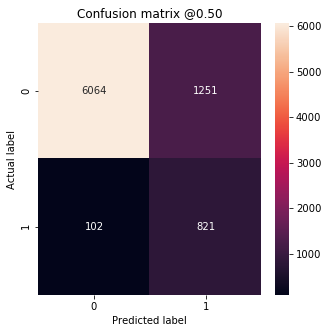

In [88]:
train_predictions_smote_baseline = smote_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote_baseline = smote_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
smote_results_baseline = smote_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_model_baseline.metrics_names, smote_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote_baseline)

### modele elaboré

In [89]:
smote_model_elab = make_model_elab()
smote_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_model_elab.fit(
    train_features_SMOTE,
    train_labels_SMOTE,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46760 samples, validate for 4 steps
Epoch 1/100
46760/46760 [==============================] - 9s 202us/sample - loss: 0.3492 - tp: 21480.0000 - fp: 5192.0000 - tn: 18188.0000 - fn: 1900.0000 - accuracy: 0.8483 - precision: 0.8053 - recall: 0.9187 - auc: 0.9196 - val_loss: 0.3218 - val_tp: 654.0000 - val_fp: 1036.0000 - val_tn: 4817.0000 - val_fn: 83.0000 - val_accuracy: 0.8302 - val_precision: 0.3870 - val_recall: 0.8874 - val_auc: 0.9283
Epoch 2/100
46760/46760 [==============================] - 8s 179us/sample - loss: 0.2964 - tp: 21887.0000 - fp: 4217.0000 - tn: 19163.0000 - fn: 1493.0000 - accuracy: 0.8779 - precision: 0.8385 - recall: 0.9361 - auc: 0.9385 - val_loss: 0.3396 - val_tp: 672.0000 - val_fp: 1149.0000 - val_tn: 4704.0000 - val_fn: 65.0000 - val_accuracy: 0.8158 - val_precision: 0.3690 - val_recall: 0.9118 - val_auc: 0.9293
Epoch 3/100
46760/46760 [==============================] - 7s 154us/sample - loss: 0.2806 - tp: 21998.0000 - fp: 3939.0000 - tn: 19441.0000

loss :  0.3356106980575118
tp :  822.0
fp :  1212.0
tn :  6103.0
fn :  101.0
accuracy :  0.84061664
precision :  0.4041298
recall :  0.8905742
auc :  0.92998254

Legitimate Transactions Detected (True Negatives):  6103
Legitimate Transactions Incorrectly Detected (False Positives):  1212
Fraudulent Transactions Missed (False Negatives):  101
Fraudulent Transactions Detected (True Positives):  822
Total Fraudulent Transactions:  923


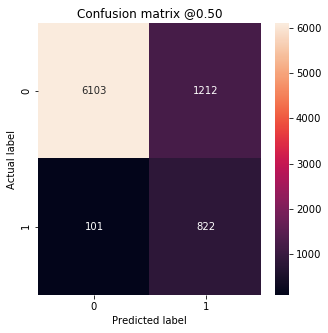

In [90]:
train_predictions_smote_elab = smote_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote_elab = smote_model_elab.predict(test_features, batch_size=BATCH_SIZE)
smote_results_elab = smote_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_model_elab.metrics_names, smote_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote_elab)

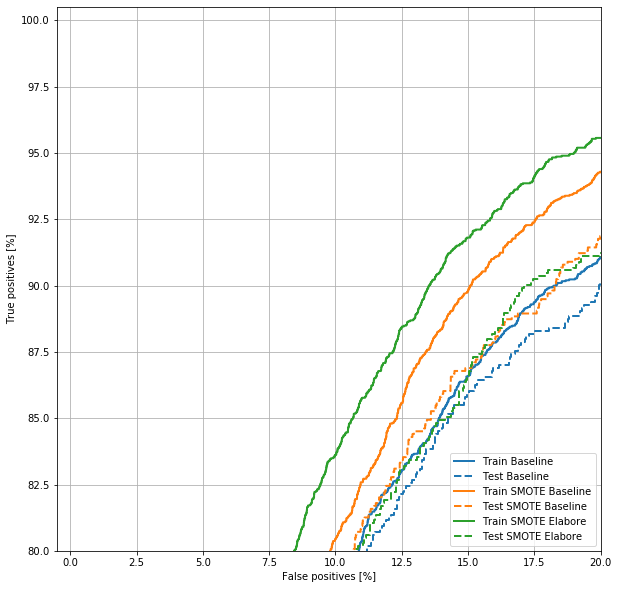

In [91]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train SMOTE Baseline", train_labels, train_predictions_smote_baseline, color=colors[1])
plot_roc("Test SMOTE Baseline", test_labels, test_predictions_smote_baseline, color=colors[1], linestyle='--')

plot_roc("Train SMOTE Elabore", train_labels, train_predictions_smote_elab, color=colors[2])
plot_roc("Test SMOTE Elabore", test_labels, test_predictions_smote_elab, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

### ADASYN (Adaptive Synthetic)

In [92]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
train_features_ADASYN, train_labels_ADASYN = ada.fit_resample(train_features, train_labels)

In [93]:
adasyn_model_baseline = make_model_baseline()
adasyn_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = adasyn_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = adasyn_model_baseline.fit(
    train_features_ADASYN,
    train_labels_ADASYN,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46760 samples, validate for 4 steps
Epoch 1/100
46760/46760 [==============================] - 9s 193us/sample - loss: 0.4938 - tp: 19151.0000 - fp: 6731.0000 - tn: 16649.0000 - fn: 4229.0000 - accuracy: 0.7656 - precision: 0.7399 - recall: 0.8191 - auc: 0.8400 - val_loss: 0.3709 - val_tp: 665.0000 - val_fp: 1150.0000 - val_tn: 4703.0000 - val_fn: 72.0000 - val_accuracy: 0.8146 - val_precision: 0.3664 - val_recall: 0.9023 - val_auc: 0.9212
Epoch 2/100
46760/46760 [==============================] - 6s 138us/sample - loss: 0.3872 - tp: 20647.0000 - fp: 4808.0000 - tn: 18572.0000 - fn: 2733.0000 - accuracy: 0.8387 - precision: 0.8111 - recall: 0.8831 - auc: 0.9031 - val_loss: 0.3497 - val_tp: 656.0000 - val_fp: 1100.0000 - val_tn: 4753.0000 - val_fn: 81.0000 - val_accuracy: 0.8208 - val_precision: 0.3736 - val_recall: 0.8901 - val_auc: 0.9238
Epoch 3/100
46760/46760 [==============================] - 6s 138us/sample - loss: 0.3740 - tp: 20966.0000 - fp: 4734.0000 - tn: 18646.0000

Epoch 21/100
46760/46760 [==============================] - 6s 139us/sample - loss: 0.3430 - tp: 22040.0000 - fp: 5511.0000 - tn: 17869.0000 - fn: 1340.0000 - accuracy: 0.8535 - precision: 0.8000 - recall: 0.9427 - auc: 0.9201 - val_loss: 0.3314 - val_tp: 663.0000 - val_fp: 1110.0000 - val_tn: 4743.0000 - val_fn: 74.0000 - val_accuracy: 0.8203 - val_precision: 0.3739 - val_recall: 0.8996 - val_auc: 0.9280
Epoch 22/100
46760/46760 [==============================] - 6s 139us/sample - loss: 0.3417 - tp: 21992.0000 - fp: 5478.0000 - tn: 17902.0000 - fn: 1388.0000 - accuracy: 0.8532 - precision: 0.8006 - recall: 0.9406 - auc: 0.9203 - val_loss: 0.3280 - val_tp: 662.0000 - val_fp: 1120.0000 - val_tn: 4733.0000 - val_fn: 75.0000 - val_accuracy: 0.8187 - val_precision: 0.3715 - val_recall: 0.8982 - val_auc: 0.9262
Epoch 23/100
46760/46760 [==============================] - 7s 142us/sample - loss: 0.3405 - tp: 21994.0000 - fp: 5481.0000 - tn: 17899.0000 - fn: 1386.0000 - accuracy: 0.8531 - prec

loss :  0.3415179602669755
tp :  846.0
fp :  1409.0
tn :  5906.0
fn :  77.0
accuracy :  0.81961644
precision :  0.3751663
recall :  0.9165764
auc :  0.93100464

Legitimate Transactions Detected (True Negatives):  5906
Legitimate Transactions Incorrectly Detected (False Positives):  1409
Fraudulent Transactions Missed (False Negatives):  77
Fraudulent Transactions Detected (True Positives):  846
Total Fraudulent Transactions:  923


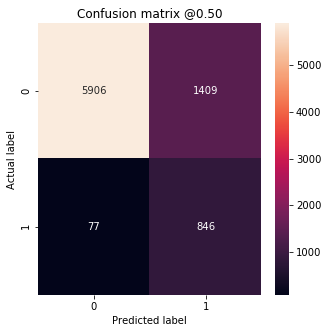

In [94]:
train_predictions_adasyn_baseline = adasyn_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_adasyn_baseline = adasyn_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
adasyn_results_baseline = adasyn_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(adasyn_model_baseline.metrics_names, adasyn_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_adasyn_baseline)

## Modele Elaboré

In [95]:
adasyn_model_elab = make_model_elab()
adasyn_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = adasyn_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = adasyn_model_elab.fit(
    train_features_ADASYN,
    train_labels_ADASYN,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46760 samples, validate for 4 steps
Epoch 1/100
46760/46760 [==============================] - 9s 203us/sample - loss: 0.3745 - tp: 21298.0000 - fp: 5359.0000 - tn: 18021.0000 - fn: 2082.0000 - accuracy: 0.8409 - precision: 0.7990 - recall: 0.9109 - auc: 0.9044 - val_loss: 0.3226 - val_tp: 666.0000 - val_fp: 1116.0000 - val_tn: 4737.0000 - val_fn: 71.0000 - val_accuracy: 0.8199 - val_precision: 0.3737 - val_recall: 0.9037 - val_auc: 0.9268
Epoch 2/100
46760/46760 [==============================] - 7s 152us/sample - loss: 0.3208 - tp: 21781.0000 - fp: 4510.0000 - tn: 18870.0000 - fn: 1599.0000 - accuracy: 0.8694 - precision: 0.8285 - recall: 0.9316 - auc: 0.9244 - val_loss: 0.3199 - val_tp: 646.0000 - val_fp: 973.0000 - val_tn: 4880.0000 - val_fn: 91.0000 - val_accuracy: 0.8385 - val_precision: 0.3990 - val_recall: 0.8765 - val_auc: 0.9288
Epoch 3/100
46760/46760 [==============================] - 8s 164us/sample - loss: 0.3051 - tp: 21827.0000 - fp: 4135.0000 - tn: 19245.0000 

loss :  0.3356106980575118
tp :  822.0
fp :  1212.0
tn :  6103.0
fn :  101.0
accuracy :  0.84061664
precision :  0.4041298
recall :  0.8905742
auc :  0.92998254

Legitimate Transactions Detected (True Negatives):  6302
Legitimate Transactions Incorrectly Detected (False Positives):  1013
Fraudulent Transactions Missed (False Negatives):  143
Fraudulent Transactions Detected (True Positives):  780
Total Fraudulent Transactions:  923


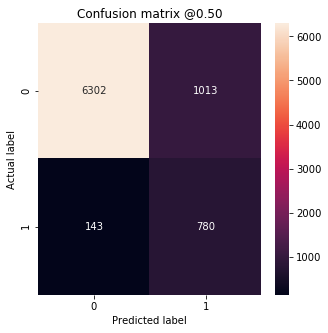

In [96]:
train_predictions_adasyn_elab = adasyn_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_adasyn_elab = adasyn_model_elab.predict(test_features, batch_size=BATCH_SIZE)
adasyn_results_elab = adasyn_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(adasyn_model_elab.metrics_names, smote_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_adasyn_elab)

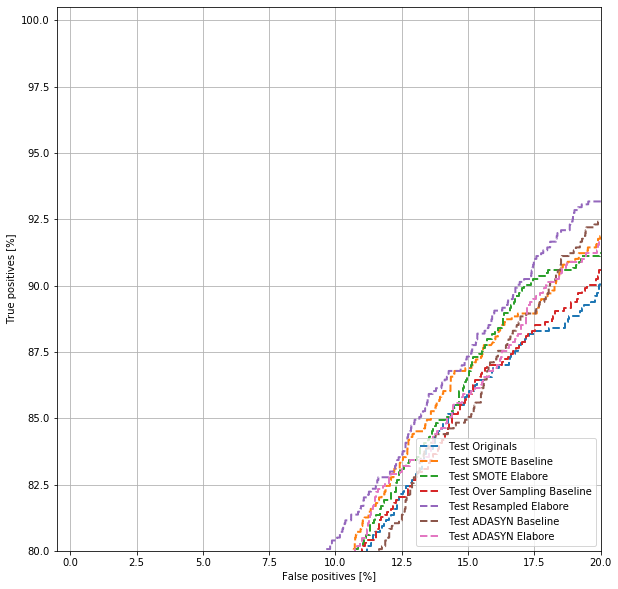

In [97]:
plot_roc("Test Originals", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Test SMOTE Baseline", test_labels, test_predictions_smote_baseline, color=colors[1], linestyle='--')
plot_roc("Test SMOTE Elabore", test_labels, test_predictions_smote_elab, color=colors[2], linestyle='--')
plot_roc("Test Over Sampling Baseline", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')
plot_roc("Test Resampled Elabore", test_labels, test_predictions_resampled_elab, color=colors[4], linestyle='--')
plot_roc("Test ADASYN Baseline", test_labels, test_predictions_adasyn_baseline, color=colors[5], linestyle='--')
plot_roc("Test ADASYN Elabore", test_labels, test_predictions_adasyn_elab, color=colors[6], linestyle='--')
plt.legend(loc='lower right')

### Tomek Links

In [98]:
from imblearn.under_sampling import TomekLinks
underTomek = TomekLinks()
features_under_tomek, labels_under_tomek = underTomek.fit_resample(train_features, train_labels)

In [99]:
tomek_model_baseline = make_model_baseline()
tomek_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = tomek_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = tomek_model_baseline.fit(
    features_under_tomek, 
    labels_under_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 25578 samples, validate for 4 steps
Epoch 1/100
25578/25578 [==============================] - 6s 220us/sample - loss: 0.4033 - tp: 970.0000 - fp: 2580.0000 - tn: 20018.0000 - fn: 2010.0000 - accuracy: 0.8205 - precision: 0.2732 - recall: 0.3255 - auc: 0.7204 - val_loss: 0.2331 - val_tp: 189.0000 - val_fp: 90.0000 - val_tn: 5763.0000 - val_fn: 548.0000 - val_accuracy: 0.9032 - val_precision: 0.6774 - val_recall: 0.2564 - val_auc: 0.8982
Epoch 2/100
25578/25578 [==============================] - 4s 157us/sample - loss: 0.2597 - tp: 932.0000 - fp: 531.0000 - tn: 22067.0000 - fn: 2048.0000 - accuracy: 0.8992 - precision: 0.6370 - recall: 0.3128 - auc: 0.8674 - val_loss: 0.2088 - val_tp: 219.0000 - val_fp: 104.0000 - val_tn: 5749.0000 - val_fn: 518.0000 - val_accuracy: 0.9056 - val_precision: 0.6780 - val_recall: 0.2972 - val_auc: 0.9175
Epoch 3/100
25578/25578 [==============================] - 3s 132us/sample - loss: 0.2283 - tp: 1099.0000 - fp: 545.0000 - tn: 22053.0000 - fn: 1

25578/25578 [==============================] - 4s 139us/sample - loss: 0.1984 - tp: 1213.0000 - fp: 530.0000 - tn: 22068.0000 - fn: 1767.0000 - accuracy: 0.9102 - precision: 0.6959 - recall: 0.4070 - auc: 0.9331 - val_loss: 0.1940 - val_tp: 328.0000 - val_fp: 196.0000 - val_tn: 5657.0000 - val_fn: 409.0000 - val_accuracy: 0.9082 - val_precision: 0.6260 - val_recall: 0.4450 - val_auc: 0.9266
Epoch 42/100
25578/25578 [==============================] - 4s 143us/sample - loss: 0.1985 - tp: 1195.0000 - fp: 497.0000 - tn: 22101.0000 - fn: 1785.0000 - accuracy: 0.9108 - precision: 0.7063 - recall: 0.4010 - auc: 0.9333 - val_loss: 0.1943 - val_tp: 328.0000 - val_fp: 191.0000 - val_tn: 5662.0000 - val_fn: 409.0000 - val_accuracy: 0.9090 - val_precision: 0.6320 - val_recall: 0.4450 - val_auc: 0.9269
Epoch 43/100
25578/25578 [==============================] - 4s 140us/sample - loss: 0.1987 - tp: 1242.0000 - fp: 565.0000 - tn: 22033.0000 - fn: 1738.0000 - accuracy: 0.9100 - precision: 0.6873 - rec

loss :  0.20055709468866906
tp :  370.0
fp :  200.0
tn :  7115.0
fn :  553.0
accuracy :  0.9085943
precision :  0.64912283
recall :  0.40086675
auc :  0.92529374

Legitimate Transactions Detected (True Negatives):  7115
Legitimate Transactions Incorrectly Detected (False Positives):  200
Fraudulent Transactions Missed (False Negatives):  553
Fraudulent Transactions Detected (True Positives):  370
Total Fraudulent Transactions:  923


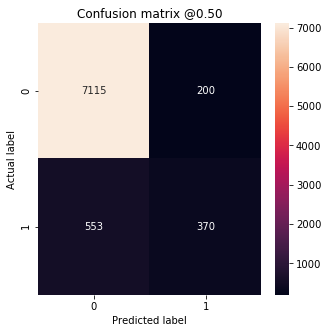

In [100]:
train_predictions_tomek_baseline = tomek_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_tomek_baseline = tomek_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
tomek_results_baseline = tomek_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(tomek_model_baseline.metrics_names, tomek_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_tomek_baseline)

### modele elabore

In [101]:
tomek_model_elab = make_model_elab()
tomek_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = tomek_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = tomek_model_elab.fit(
    features_under_tomek, 
    labels_under_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 25578 samples, validate for 4 steps
Epoch 1/100
25578/25578 [==============================] - 7s 289us/sample - loss: 0.2419 - tp: 961.0000 - fp: 533.0000 - tn: 22065.0000 - fn: 2019.0000 - accuracy: 0.9002 - precision: 0.6432 - recall: 0.3225 - auc: 0.8894 - val_loss: 0.1965 - val_tp: 418.0000 - val_fp: 265.0000 - val_tn: 5588.0000 - val_fn: 319.0000 - val_accuracy: 0.9114 - val_precision: 0.6120 - val_recall: 0.5672 - val_auc: 0.9238
Epoch 2/100
25578/25578 [==============================] - 4s 157us/sample - loss: 0.2048 - tp: 1441.0000 - fp: 714.0000 - tn: 21884.0000 - fn: 1539.0000 - accuracy: 0.9119 - precision: 0.6687 - recall: 0.4836 - auc: 0.9257 - val_loss: 0.1930 - val_tp: 353.0000 - val_fp: 194.0000 - val_tn: 5659.0000 - val_fn: 384.0000 - val_accuracy: 0.9123 - val_precision: 0.6453 - val_recall: 0.4790 - val_auc: 0.9276
Epoch 3/100
25578/25578 [==============================] - 4s 158us/sample - loss: 0.2008 - tp: 1452.0000 - fp: 678.0000 - tn: 21920.0000 - fn: 

loss :  0.1943800748624568
tp :  607.0
fp :  456.0
tn :  6859.0
fn :  316.0
accuracy :  0.9062879
precision :  0.5710254
recall :  0.65763813
auc :  0.9346473

Legitimate Transactions Detected (True Negatives):  6859
Legitimate Transactions Incorrectly Detected (False Positives):  456
Fraudulent Transactions Missed (False Negatives):  316
Fraudulent Transactions Detected (True Positives):  607
Total Fraudulent Transactions:  923


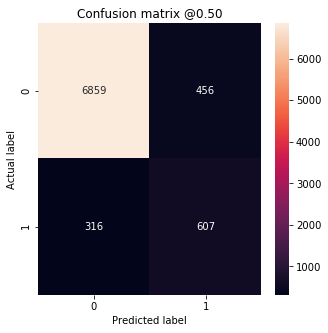

In [102]:
train_predictions_tomek_elab = tomek_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_tomek_elab = tomek_model_elab.predict(test_features, batch_size=BATCH_SIZE)
tomek_results_elab = tomek_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(tomek_model_elab.metrics_names, tomek_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_tomek_elab)

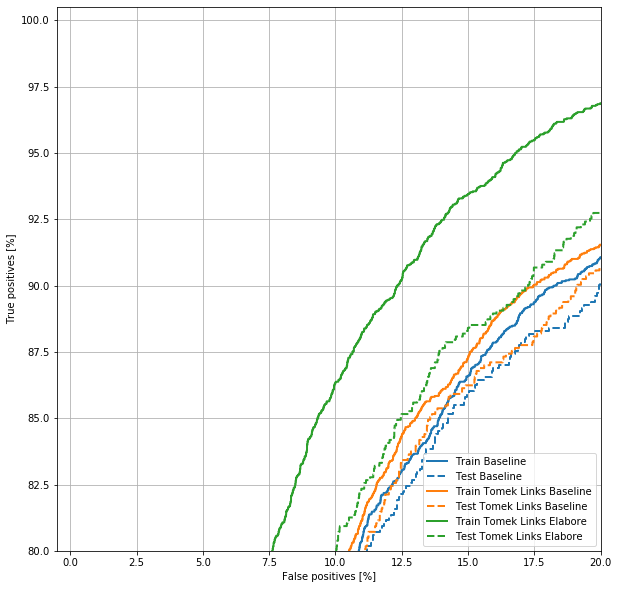

In [103]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Tomek Links Baseline", train_labels, train_predictions_tomek_baseline, color=colors[1])
plot_roc("Test Tomek Links Baseline", test_labels, test_predictions_tomek_baseline, color=colors[1], linestyle='--')

plot_roc("Train Tomek Links Elabore", train_labels, train_predictions_tomek_elab, color=colors[2])
plot_roc("Test Tomek Links Elabore", test_labels, test_predictions_tomek_elab, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

### Random Under Sampling

In [104]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy="majority")
train_features_RandomUnderSampler, train_labels_RandomUnderSampler = undersampler.fit_resample(train_features, train_labels)

In [105]:
randomUnderSampler_model_baseline = make_model_baseline()
randomUnderSampler_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = adasyn_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = randomUnderSampler_model_baseline.fit(
    train_features_RandomUnderSampler,
    train_labels_RandomUnderSampler,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 5960 samples, validate for 4 steps
Epoch 1/100
5960/5960 [==============================] - 3s 492us/sample - loss: 0.8271 - tp: 1101.0000 - fp: 437.0000 - tn: 2543.0000 - fn: 1879.0000 - accuracy: 0.6114 - precision: 0.7159 - recall: 0.3695 - auc: 0.6397 - val_loss: 0.4421 - val_tp: 477.0000 - val_fp: 974.0000 - val_tn: 4879.0000 - val_fn: 260.0000 - val_accuracy: 0.8127 - val_precision: 0.3287 - val_recall: 0.6472 - val_auc: 0.8495
Epoch 2/100
5960/5960 [==============================] - 1s 137us/sample - loss: 0.5675 - tp: 1953.0000 - fp: 617.0000 - tn: 2363.0000 - fn: 1027.0000 - accuracy: 0.7242 - precision: 0.7599 - recall: 0.6554 - auc: 0.8023 - val_loss: 0.4261 - val_tp: 567.0000 - val_fp: 980.0000 - val_tn: 4873.0000 - val_fn: 170.0000 - val_accuracy: 0.8255 - val_precision: 0.3665 - val_recall: 0.7693 - val_auc: 0.8915
Epoch 3/100
5960/5960 [==============================] - 1s 138us/sample - loss: 0.5123 - tp: 2095.0000 - fp: 558.0000 - tn: 2422.0000 - fn: 885.0000 

5960/5960 [==============================] - 1s 141us/sample - loss: 0.3519 - tp: 2566.0000 - fp: 488.0000 - tn: 2492.0000 - fn: 414.0000 - accuracy: 0.8487 - precision: 0.8402 - recall: 0.8611 - auc: 0.9221 - val_loss: 0.3375 - val_tp: 641.0000 - val_fp: 926.0000 - val_tn: 4927.0000 - val_fn: 96.0000 - val_accuracy: 0.8449 - val_precision: 0.4091 - val_recall: 0.8697 - val_auc: 0.9283
Epoch 42/100
5960/5960 [==============================] - 1s 143us/sample - loss: 0.3536 - tp: 2556.0000 - fp: 467.0000 - tn: 2513.0000 - fn: 424.0000 - accuracy: 0.8505 - precision: 0.8455 - recall: 0.8577 - auc: 0.9220 - val_loss: 0.3323 - val_tp: 639.0000 - val_fp: 914.0000 - val_tn: 4939.0000 - val_fn: 98.0000 - val_accuracy: 0.8464 - val_precision: 0.4115 - val_recall: 0.8670 - val_auc: 0.9286
Epoch 43/100
5960/5960 [==============================] - 1s 155us/sample - loss: 0.3520 - tp: 2562.0000 - fp: 476.0000 - tn: 2504.0000 - fn: 418.0000 - accuracy: 0.8500 - precision: 0.8433 - recall: 0.8597 - 

loss :  0.3415179602669755
tp :  846.0
fp :  1409.0
tn :  5906.0
fn :  77.0
accuracy :  0.81961644
precision :  0.3751663
recall :  0.9165764
auc :  0.93100464

Legitimate Transactions Detected (True Negatives):  6060
Legitimate Transactions Incorrectly Detected (False Positives):  1255
Fraudulent Transactions Missed (False Negatives):  122
Fraudulent Transactions Detected (True Positives):  801
Total Fraudulent Transactions:  923


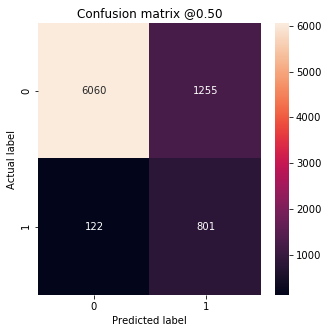

In [106]:
train_predictions_randomUnderSampler_baseline = randomUnderSampler_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_randomUnderSampler_baseline = randomUnderSampler_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
randomUnderSampler_results_baseline = randomUnderSampler_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(randomUnderSampler_model_baseline.metrics_names, adasyn_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_randomUnderSampler_baseline)

### Modele Elaboré

In [107]:
randomUnderSampler_model_elab = make_model_elab()
randomUnderSampler_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = randomUnderSampler_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = randomUnderSampler_model_elab.fit(
    train_features_RandomUnderSampler,
    train_labels_RandomUnderSampler,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 5960 samples, validate for 4 steps
Epoch 1/100
5960/5960 [==============================] - 4s 590us/sample - loss: 0.4885 - tp: 2441.0000 - fp: 897.0000 - tn: 2083.0000 - fn: 539.0000 - accuracy: 0.7591 - precision: 0.7313 - recall: 0.8191 - auc: 0.8457 - val_loss: 0.3189 - val_tp: 650.0000 - val_fp: 1086.0000 - val_tn: 4767.0000 - val_fn: 87.0000 - val_accuracy: 0.8220 - val_precision: 0.3744 - val_recall: 0.8820 - val_auc: 0.9190
Epoch 2/100
5960/5960 [==============================] - 1s 158us/sample - loss: 0.3851 - tp: 2658.0000 - fp: 652.0000 - tn: 2328.0000 - fn: 322.0000 - accuracy: 0.8366 - precision: 0.8030 - recall: 0.8919 - auc: 0.9048 - val_loss: 0.3751 - val_tp: 672.0000 - val_fp: 1303.0000 - val_tn: 4550.0000 - val_fn: 65.0000 - val_accuracy: 0.7924 - val_precision: 0.3403 - val_recall: 0.9118 - val_auc: 0.9255
Epoch 3/100
5960/5960 [==============================] - 1s 158us/sample - loss: 0.3638 - tp: 2677.0000 - fp: 618.0000 - tn: 2362.0000 - fn: 303.0000 - 

loss :  0.3407040743840554
tp :  835.0
fp :  1469.0
tn :  5846.0
fn :  88.0
accuracy :  0.81099784
precision :  0.3624132
recall :  0.90465873
auc :  0.9293122

Legitimate Transactions Detected (True Negatives):  5846
Legitimate Transactions Incorrectly Detected (False Positives):  1469
Fraudulent Transactions Missed (False Negatives):  88
Fraudulent Transactions Detected (True Positives):  835
Total Fraudulent Transactions:  923


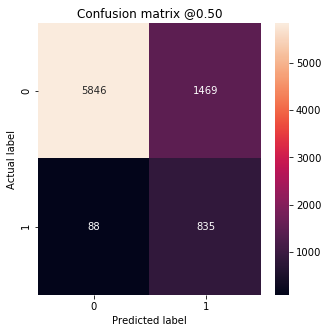

In [108]:
train_predictions_randomUnderSampler_elab = randomUnderSampler_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_randomUnderSampler_elab = randomUnderSampler_model_elab.predict(test_features, batch_size=BATCH_SIZE)
randomUnderSampler_results_elab = randomUnderSampler_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(randomUnderSampler_model_elab.metrics_names, randomUnderSampler_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_randomUnderSampler_elab)

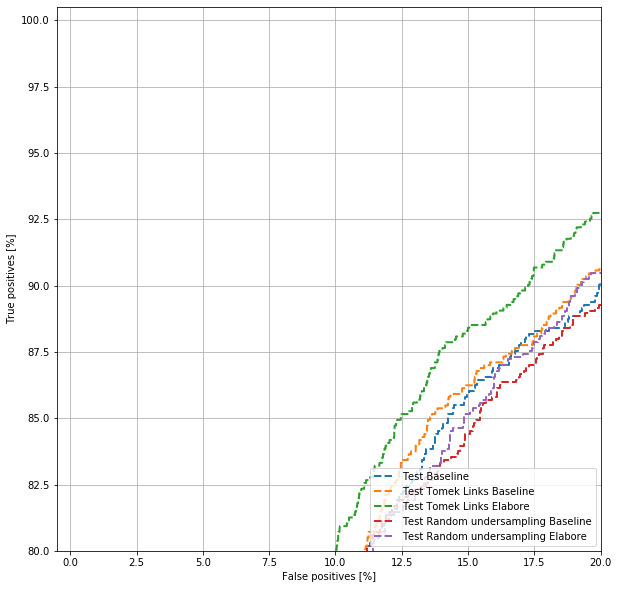

In [109]:
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Test Tomek Links Baseline", test_labels, test_predictions_tomek_baseline, color=colors[1], linestyle='--')
plot_roc("Test Tomek Links Elabore", test_labels, test_predictions_tomek_elab, color=colors[2], linestyle='--')
plot_roc("Test Random undersampling Baseline", test_labels, test_predictions_randomUnderSampler_baseline, color=colors[3], linestyle='--')
plot_roc("Test Random undersampling Elabore", test_labels, test_predictions_randomUnderSampler_elab, color=colors[4], linestyle='--')

plt.legend(loc='lower right')

### Approches Hybrides

### RandomOverSampling + Tomek Links

In [110]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(sampling_strategy="minority")

features_RandomOverSampler, labels_RandomOverSampler = over_sampling.fit_resample(train_features, train_labels)

underTomek = TomekLinks()
features_ROS_tomek, labels_ROS_tomek = underTomek.fit_resample(features_RandomOverSampler, labels_RandomOverSampler)

In [111]:
ROS_tomek_model_baseline = make_model_baseline()
ROS_tomek_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = ROS_tomek_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = ROS_tomek_model_baseline.fit(
    features_ROS_tomek, 
    labels_ROS_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46760 samples, validate for 4 steps
Epoch 1/100
46760/46760 [==============================] - 8s 181us/sample - loss: 0.4733 - tp: 19094.0000 - fp: 6226.0000 - tn: 17154.0000 - fn: 4286.0000 - accuracy: 0.7752 - precision: 0.7541 - recall: 0.8167 - auc: 0.8567 - val_loss: 0.3648 - val_tp: 658.0000 - val_fp: 1063.0000 - val_tn: 4790.0000 - val_fn: 79.0000 - val_accuracy: 0.8267 - val_precision: 0.3823 - val_recall: 0.8928 - val_auc: 0.9241
Epoch 2/100
46760/46760 [==============================] - 6s 137us/sample - loss: 0.3730 - tp: 20369.0000 - fp: 4378.0000 - tn: 19002.0000 - fn: 3011.0000 - accuracy: 0.8420 - precision: 0.8231 - recall: 0.8712 - auc: 0.9130 - val_loss: 0.3356 - val_tp: 636.0000 - val_fp: 961.0000 - val_tn: 4892.0000 - val_fn: 101.0000 - val_accuracy: 0.8388 - val_precision: 0.3982 - val_recall: 0.8630 - val_auc: 0.9261
Epoch 3/100
46760/46760 [==============================] - 6s 136us/sample - loss: 0.3595 - tp: 20530.0000 - fp: 4192.0000 - tn: 19188.0000

Epoch 21/100
46760/46760 [==============================] - 7s 146us/sample - loss: 0.3396 - tp: 21352.0000 - fp: 4944.0000 - tn: 18436.0000 - fn: 2028.0000 - accuracy: 0.8509 - precision: 0.8120 - recall: 0.9133 - auc: 0.9259 - val_loss: 0.3150 - val_tp: 651.0000 - val_fp: 932.0000 - val_tn: 4921.0000 - val_fn: 86.0000 - val_accuracy: 0.8455 - val_precision: 0.4112 - val_recall: 0.8833 - val_auc: 0.9308
Epoch 22/100
46760/46760 [==============================] - 7s 142us/sample - loss: 0.3391 - tp: 21424.0000 - fp: 5097.0000 - tn: 18283.0000 - fn: 1956.0000 - accuracy: 0.8492 - precision: 0.8078 - recall: 0.9163 - auc: 0.9262 - val_loss: 0.3472 - val_tp: 670.0000 - val_fp: 1111.0000 - val_tn: 4742.0000 - val_fn: 67.0000 - val_accuracy: 0.8212 - val_precision: 0.3762 - val_recall: 0.9091 - val_auc: 0.9307
Epoch 23/100
46760/46760 [==============================] - 7s 143us/sample - loss: 0.3372 - tp: 21580.0000 - fp: 5310.0000 - tn: 18070.0000 - fn: 1800.0000 - accuracy: 0.8479 - preci

46760/46760 [==============================] - 7s 147us/sample - loss: 0.3319 - tp: 21795.0000 - fp: 5415.0000 - tn: 17965.0000 - fn: 1585.0000 - accuracy: 0.8503 - precision: 0.8010 - recall: 0.9322 - auc: 0.9283 - val_loss: 0.3219 - val_tp: 665.0000 - val_fp: 1057.0000 - val_tn: 4796.0000 - val_fn: 72.0000 - val_accuracy: 0.8287 - val_precision: 0.3862 - val_recall: 0.9023 - val_auc: 0.9326
Epoch 62/100
46760/46760 [==============================] - 7s 143us/sample - loss: 0.3296 - tp: 21903.0000 - fp: 5484.0000 - tn: 17896.0000 - fn: 1477.0000 - accuracy: 0.8511 - precision: 0.7998 - recall: 0.9368 - auc: 0.9293 - val_loss: 0.3034 - val_tp: 664.0000 - val_fp: 1025.0000 - val_tn: 4828.0000 - val_fn: 73.0000 - val_accuracy: 0.8334 - val_precision: 0.3931 - val_recall: 0.9009 - val_auc: 0.9325
Epoch 63/100
46760/46760 [==============================] - 7s 146us/sample - loss: 0.3314 - tp: 21850.0000 - fp: 5448.0000 - tn: 17932.0000 - fn: 1530.0000 - accuracy: 0.8508 - precision: 0.8004

loss :  0.33057863400757503
tp :  844.0
fp :  1410.0
tn :  5905.0
fn :  79.0
accuracy :  0.81925225
precision :  0.37444544
recall :  0.9144095
auc :  0.9338085

Legitimate Transactions Detected (True Negatives):  5905
Legitimate Transactions Incorrectly Detected (False Positives):  1410
Fraudulent Transactions Missed (False Negatives):  79
Fraudulent Transactions Detected (True Positives):  844
Total Fraudulent Transactions:  923


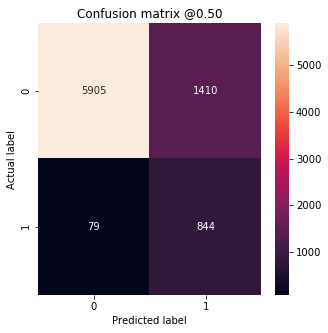

In [112]:
train_predictions_ROS_tomek_baseline = ROS_tomek_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_ROS_tomek_baseline = ROS_tomek_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
ROS_tomek_results_baseline = ROS_tomek_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(ROS_tomek_model_baseline.metrics_names, ROS_tomek_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_ROS_tomek_baseline)

###  modele elaboré

In [113]:
ROS_tomek_elab = make_model_elab()
ROS_tomek_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = ROS_tomek_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = ROS_tomek_elab.fit(
    features_ROS_tomek, 
    labels_ROS_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46760 samples, validate for 4 steps
Epoch 1/100
46760/46760 [==============================] - 10s 222us/sample - loss: 0.3709 - tp: 20980.0000 - fp: 5069.0000 - tn: 18311.0000 - fn: 2400.0000 - accuracy: 0.8403 - precision: 0.8054 - recall: 0.8973 - auc: 0.9114 - val_loss: 0.2985 - val_tp: 660.0000 - val_fp: 1029.0000 - val_tn: 4824.0000 - val_fn: 77.0000 - val_accuracy: 0.8322 - val_precision: 0.3908 - val_recall: 0.8955 - val_auc: 0.9309
Epoch 2/100
46760/46760 [==============================] - 7s 155us/sample - loss: 0.3220 - tp: 21331.0000 - fp: 4319.0000 - tn: 19061.0000 - fn: 2049.0000 - accuracy: 0.8638 - precision: 0.8316 - recall: 0.9124 - auc: 0.9292 - val_loss: 0.3391 - val_tp: 667.0000 - val_fp: 1083.0000 - val_tn: 4770.0000 - val_fn: 70.0000 - val_accuracy: 0.8250 - val_precision: 0.3811 - val_recall: 0.9050 - val_auc: 0.9336
Epoch 3/100
46760/46760 [==============================] - 7s 154us/sample - loss: 0.3046 - tp: 21449.0000 - fp: 4018.0000 - tn: 19362.000

loss :  0.31537391065567205
tp :  825.0
fp :  1227.0
tn :  6088.0
fn :  98.0
accuracy :  0.83915997
precision :  0.40204677
recall :  0.89382446
auc :  0.93397546

Legitimate Transactions Detected (True Negatives):  6088
Legitimate Transactions Incorrectly Detected (False Positives):  1227
Fraudulent Transactions Missed (False Negatives):  98
Fraudulent Transactions Detected (True Positives):  825
Total Fraudulent Transactions:  923


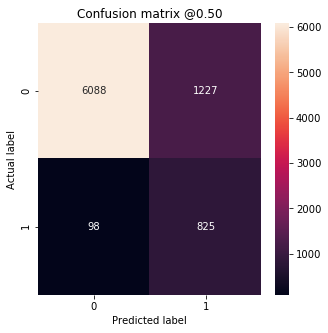

In [114]:
train_predictions_ROS_tomek_elab = ROS_tomek_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_ROS_tomek_elab = ROS_tomek_elab.predict(test_features, batch_size=BATCH_SIZE)
ROS_tomek_results_elab = ROS_tomek_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(ROS_tomek_elab.metrics_names, ROS_tomek_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_ROS_tomek_elab)

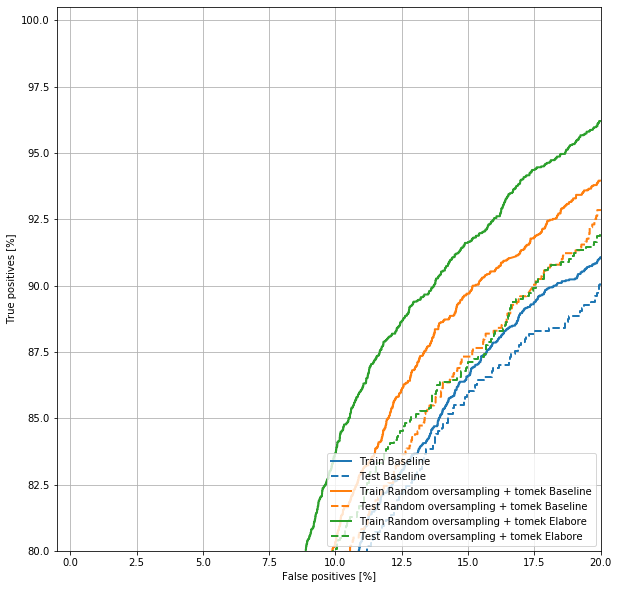

In [115]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Random oversampling + tomek Baseline", train_labels, train_predictions_ROS_tomek_baseline, color=colors[1])
plot_roc("Test Random oversampling + tomek Baseline", test_labels, test_predictions_ROS_tomek_baseline, color=colors[1], linestyle='--')

plot_roc("Train Random oversampling + tomek Elabore", train_labels, train_predictions_ROS_tomek_elab, color=colors[2])
plot_roc("Test Random oversampling + tomek Elabore", test_labels, test_predictions_ROS_tomek_elab, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

### SMOTE + Tomek Links

In [116]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

features_SMOTE_tomek, labels_SMOTE_tomek = smt.fit_sample(train_features, train_labels)



In [117]:
smote_tomek_model_baseline = make_model_baseline()
smote_tomek_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_tomek_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_tomek_model_baseline.fit(
    features_SMOTE_tomek,
    labels_SMOTE_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46618 samples, validate for 4 steps
Epoch 1/100
46618/46618 [==============================] - 8s 176us/sample - loss: 0.4659 - tp: 19343.0000 - fp: 6188.0000 - tn: 17121.0000 - fn: 3966.0000 - accuracy: 0.7822 - precision: 0.7576 - recall: 0.8299 - auc: 0.8614 - val_loss: 0.3547 - val_tp: 652.0000 - val_fp: 1037.0000 - val_tn: 4816.0000 - val_fn: 85.0000 - val_accuracy: 0.8297 - val_precision: 0.3860 - val_recall: 0.8847 - val_auc: 0.9238
Epoch 2/100
46618/46618 [==============================] - 6s 131us/sample - loss: 0.3564 - tp: 20740.0000 - fp: 4210.0000 - tn: 19099.0000 - fn: 2569.0000 - accuracy: 0.8546 - precision: 0.8313 - recall: 0.8898 - auc: 0.9204 - val_loss: 0.3391 - val_tp: 637.0000 - val_fp: 962.0000 - val_tn: 4891.0000 - val_fn: 100.0000 - val_accuracy: 0.8388 - val_precision: 0.3984 - val_recall: 0.8643 - val_auc: 0.9253
Epoch 3/100
46618/46618 [==============================] - 6s 133us/sample - loss: 0.3437 - tp: 20950.0000 - fp: 4018.0000 - tn: 19291.0000

Epoch 21/100
46618/46618 [==============================] - 6s 134us/sample - loss: 0.3219 - tp: 21830.0000 - fp: 4983.0000 - tn: 18326.0000 - fn: 1479.0000 - accuracy: 0.8614 - precision: 0.8142 - recall: 0.9365 - auc: 0.9328 - val_loss: 0.3217 - val_tp: 657.0000 - val_fp: 992.0000 - val_tn: 4861.0000 - val_fn: 80.0000 - val_accuracy: 0.8373 - val_precision: 0.3984 - val_recall: 0.8915 - val_auc: 0.9280
Epoch 22/100
46618/46618 [==============================] - 6s 137us/sample - loss: 0.3226 - tp: 21821.0000 - fp: 5053.0000 - tn: 18256.0000 - fn: 1488.0000 - accuracy: 0.8597 - precision: 0.8120 - recall: 0.9362 - auc: 0.9326 - val_loss: 0.3170 - val_tp: 642.0000 - val_fp: 932.0000 - val_tn: 4921.0000 - val_fn: 95.0000 - val_accuracy: 0.8442 - val_precision: 0.4079 - val_recall: 0.8711 - val_auc: 0.9288
Epoch 23/100
46618/46618 [==============================] - 6s 134us/sample - loss: 0.3212 - tp: 21861.0000 - fp: 4994.0000 - tn: 18315.0000 - fn: 1448.0000 - accuracy: 0.8618 - precis

loss :  0.3308568862593559
tp :  812.0
fp :  1272.0
tn :  6043.0
fn :  111.0
accuracy :  0.83211946
precision :  0.38963532
recall :  0.87974
auc :  0.92780733

Legitimate Transactions Detected (True Negatives):  6043
Legitimate Transactions Incorrectly Detected (False Positives):  1272
Fraudulent Transactions Missed (False Negatives):  111
Fraudulent Transactions Detected (True Positives):  812
Total Fraudulent Transactions:  923


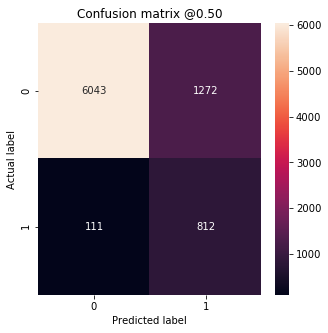

In [118]:
train_predictions_SMOTE_tomek_baseline = smote_tomek_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_SMOTE_tomek_baseline = smote_tomek_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
SMOTE_tomek_results_baseline = smote_tomek_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_tomek_model_baseline.metrics_names, SMOTE_tomek_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_SMOTE_tomek_baseline)

### modele elaboré

In [119]:
smote_tomek_elab = make_model_elab()
smote_tomek_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_tomek_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_tomek_elab.fit(
    features_SMOTE_tomek, 
    labels_SMOTE_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 46618 samples, validate for 4 steps
Epoch 1/100
46618/46618 [==============================] - 9s 203us/sample - loss: 0.3519 - tp: 21176.0000 - fp: 4753.0000 - tn: 18556.0000 - fn: 2133.0000 - accuracy: 0.8523 - precision: 0.8167 - recall: 0.9085 - auc: 0.9185 - val_loss: 0.3086 - val_tp: 654.0000 - val_fp: 975.0000 - val_tn: 4878.0000 - val_fn: 83.0000 - val_accuracy: 0.8395 - val_precision: 0.4015 - val_recall: 0.8874 - val_auc: 0.9298
Epoch 2/100
46618/46618 [==============================] - 7s 155us/sample - loss: 0.2988 - tp: 21684.0000 - fp: 4023.0000 - tn: 19286.0000 - fn: 1625.0000 - accuracy: 0.8788 - precision: 0.8435 - recall: 0.9303 - auc: 0.9376 - val_loss: 0.2812 - val_tp: 630.0000 - val_fp: 810.0000 - val_tn: 5043.0000 - val_fn: 107.0000 - val_accuracy: 0.8608 - val_precision: 0.4375 - val_recall: 0.8548 - val_auc: 0.9310
Epoch 3/100
46618/46618 [==============================] - 7s 155us/sample - loss: 0.2826 - tp: 21696.0000 - fp: 3594.0000 - tn: 19715.0000 

loss :  0.3012676756990914
tp :  787.0
fp :  972.0
tn :  6343.0
fn :  136.0
accuracy :  0.86550134
precision :  0.4474133
recall :  0.8526544
auc :  0.9320813

Legitimate Transactions Detected (True Negatives):  6343
Legitimate Transactions Incorrectly Detected (False Positives):  972
Fraudulent Transactions Missed (False Negatives):  136
Fraudulent Transactions Detected (True Positives):  787
Total Fraudulent Transactions:  923


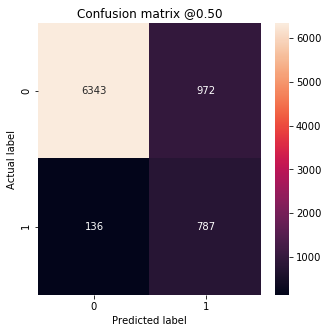

In [120]:
train_predictions_smote_tomek_elab = smote_tomek_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote_tomek_elab = smote_tomek_elab.predict(test_features, batch_size=BATCH_SIZE)
smote_tomek_results_elab = smote_tomek_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_tomek_elab.metrics_names, smote_tomek_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote_tomek_elab)

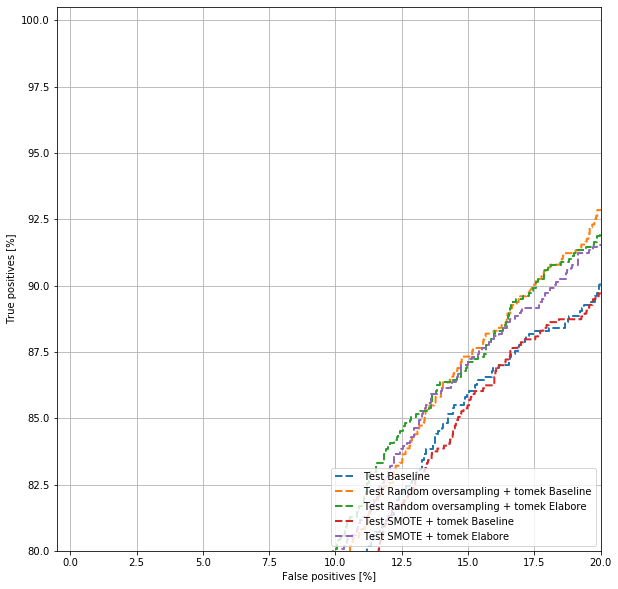

In [121]:
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Test Random oversampling + tomek Baseline", test_labels, test_predictions_ROS_tomek_baseline, color=colors[1], linestyle='--')
plot_roc("Test Random oversampling + tomek Elabore", test_labels, test_predictions_ROS_tomek_elab, color=colors[2], linestyle='--')
plot_roc("Test SMOTE + tomek Baseline", test_labels, test_predictions_SMOTE_tomek_baseline, color=colors[3], linestyle='--')
plot_roc("Test SMOTE + tomek Elabore", test_labels, test_predictions_smote_tomek_elab, color=colors[4], linestyle='--')
plt.legend(loc='lower right')